# **Clustering Countries for Strategic Aid Allocation**


In [217]:
# Importing relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [218]:
df = pd.read_csv("Country_data.csv",\
                        index_col='country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [219]:
df.shape

(167, 9)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [221]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


After checking general dataset stats, we can confirm the dataset contain valid data:

1. Average life expectancy: 70.5 years
2. Average child mortality rate (per 1,000 live births): 38.3
3. Average fertility rate: 2.9
4. Median fertility rate: 2.4
5. Average GDP per capita: 12,964 USD
6. Average Income: 17,145 USD

# **Data Clean-up**

In [222]:
# Checking for duplicates
df.duplicated().sum()

0

In [223]:
# Checking for missing values
df.isnull().sum()

,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


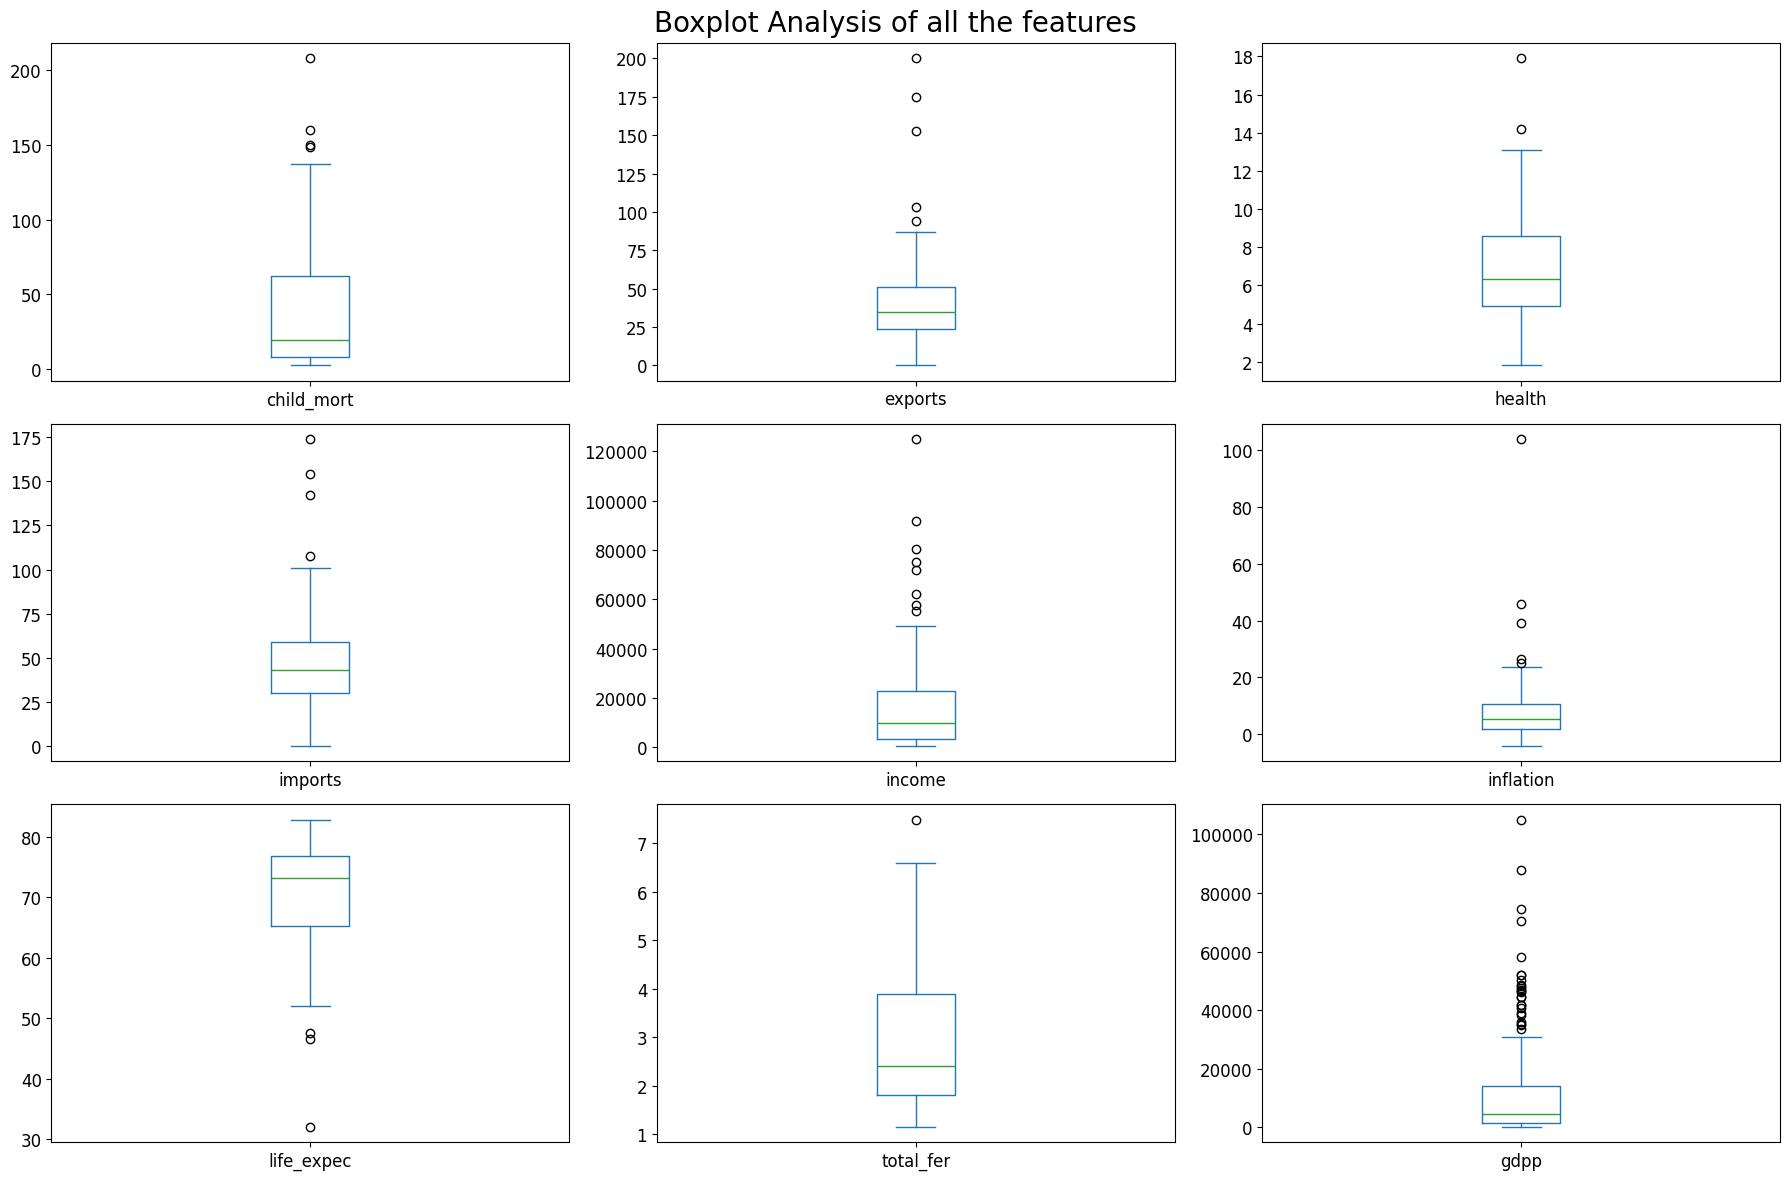

In [224]:
fig = plt.figure(figsize=(18,12))

df['child_mort'].plot(kind='box', fontsize=12, ax=fig.add_subplot(3,3,1))
df['exports'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,2))
df['health'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,3))
df['imports'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,4))
df['income'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,5))
df['inflation'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,6))
df['life_expec'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,7))
df['total_fer'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,8))
df['gdpp'].plot(kind='box', fontsize=12,ax=fig.add_subplot(3,3,9))

fig.suptitle('Boxplot Analysis of all the features', fontsize=20)
plt.tight_layout()
plt.show()

In [225]:
# Functions detecting outliers
def outlier_visualizer(col, vert=True, grid=True):

    (df[col].plot(kind='box',vert=vert))
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()

def outlier_finder(col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'country':[], col:[]}

    for i,c in enumerate(df[col]):
        if c < left_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)

    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('country', inplace=True)

    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/df.shape[0]*100,2)))
    return outliers_df

In [226]:
outlier_finder('child_mort')

child_mort - % of outliers: 2.4%


,child_mort
country,
Central African Republic,149.0
Chad,150.0
Haiti,208.0
Sierra Leone,160.0


In [227]:
outlier_finder('exports')

exports - % of outliers: 2.99%


,exports
country,
Ireland,103.0
Luxembourg,175.0
Malta,153.0
Seychelles,93.8
Singapore,200.0


In [228]:
outlier_finder('health')

health - % of outliers: 1.2%


,health
country,
"Micronesia, Fed. Sts.",14.2
United States,17.9


In [229]:
outlier_finder('exports')

exports - % of outliers: 2.99%


,exports
country,
Ireland,103.0
Luxembourg,175.0
Malta,153.0
Seychelles,93.8
Singapore,200.0


In [230]:
outlier_finder('imports')

imports - % of outliers: 2.4%


,imports
country,
Luxembourg,142.0
Malta,154.0
Seychelles,108.0
Singapore,174.0


In [231]:
outlier_finder('income')

income - % of outliers: 4.79%


,income
country,
Brunei,80600
Kuwait,75200
Luxembourg,91700
Norway,62300
Qatar,125000
Singapore,72100
Switzerland,55500
United Arab Emirates,57600


In [232]:
outlier_finder('inflation')

inflation - % of outliers: 2.99%


,inflation
country,
Equatorial Guinea,24.9
Mongolia,39.2
Nigeria,104.0
Timor-Leste,26.5
Venezuela,45.9


In [233]:
outlier_finder('life_expec')

life_expec - % of outliers: 1.8%


,life_expec
country,
Central African Republic,47.5
Haiti,32.1
Lesotho,46.5


In [234]:
outlier_finder('total_fer')

total_fer - % of outliers: 0.6%


,total_fer
country,
Niger,7.49


In [235]:
outlier_finder('gdpp')

gdpp - % of outliers: 14.97%


,gdpp
country,
Australia,51900
Austria,46900
Belgium,44400
Brunei,35300
Canada,47400
Denmark,58000
Finland,46200
France,40600
Germany,41800


In [236]:
print('Numbers of gdpp outliers: ',len(outlier_finder('gdpp')))

gdpp - % of outliers: 14.97%
Numbers of gdpp outliers:  25


# **Exploratory Data Analysis**

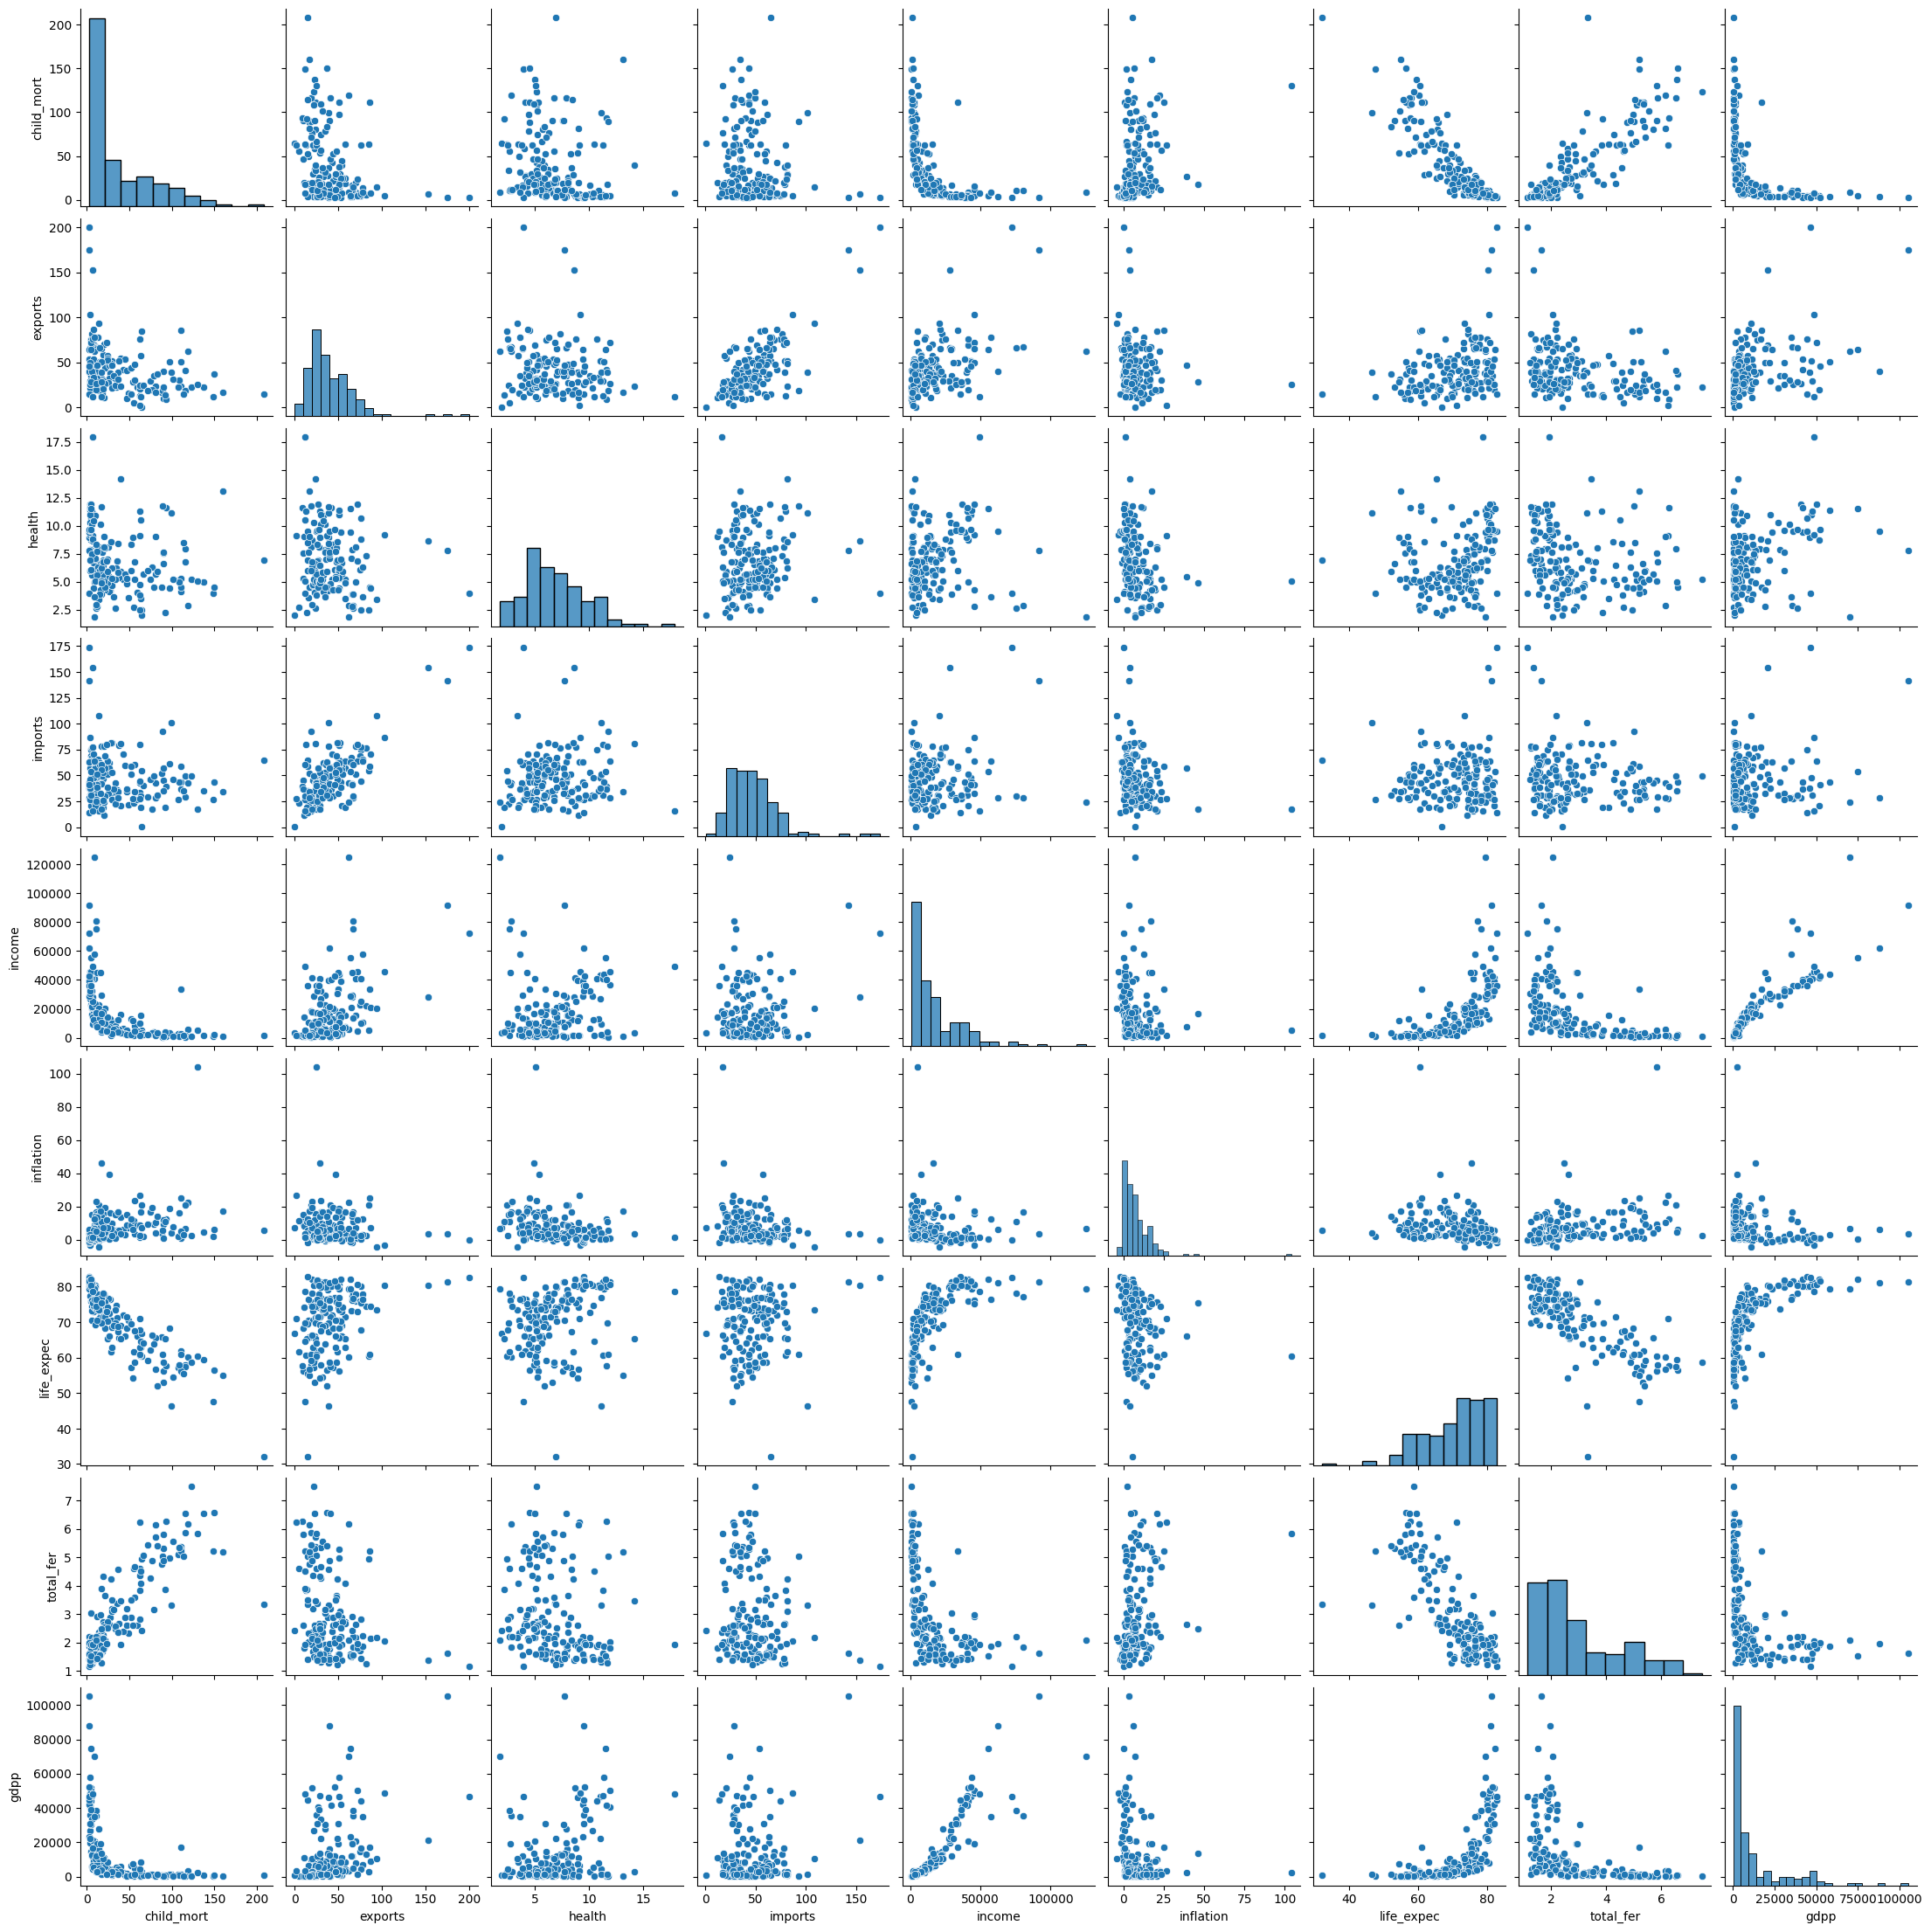

In [237]:
# Checkinmg skewness all the features
sns.pairplot(df)
plt.show()

**Skewness Distribution**:

Some of the features seem to be quite right-skewed:

* child_mort
* exports
* imports
* income
* inflation
* total_fer
* gdpp

1 feature seem to be left-skewed:

* left_expec


The remaining features seem to have a more or less normal distribution:

* health

In [238]:
# let's check variable skewness
df.skew()

,0
child_mort,1.450774
exports,2.445824
health,0.705746
imports,1.905276
income,2.231480
inflation,5.154049
life_expec,-0.970996
total_fer,0.967092
gdpp,2.218051


In [239]:
# Checking correlation features
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [240]:
# Checking linear correlation among features :
def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [241]:
corr_matrix(df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,,,,,,,-0.886676,0.848478,
exports,,,,0.737381,,,,,
health,,,,,,,,,
imports,,0.737381,,,,,,,
income,,,,,,,,,0.895571
inflation,,,,,,,,,
life_expec,-0.886676,,,,,,,-0.760875,
total_fer,0.848478,,,,,,-0.760875,,
gdpp,,,,,0.895571,,,,


"Health" is the only normally distributed feature.

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




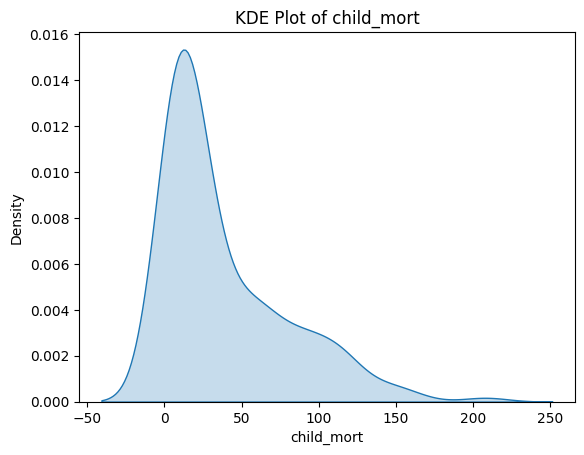

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




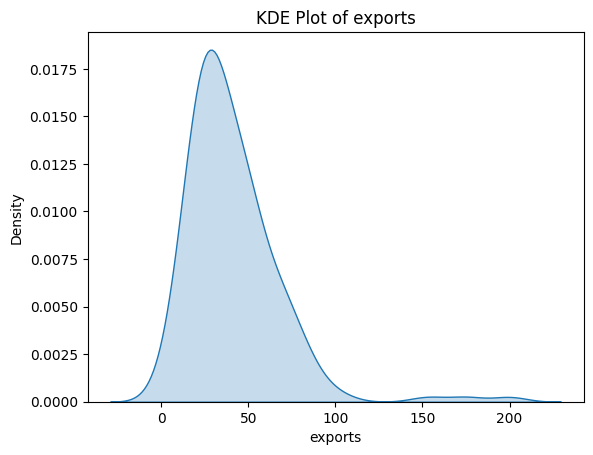

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




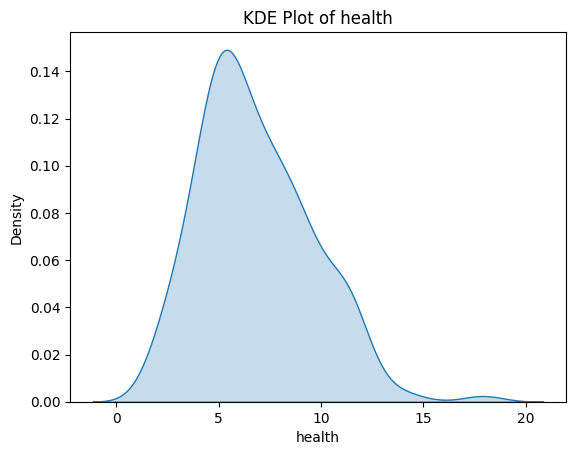

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




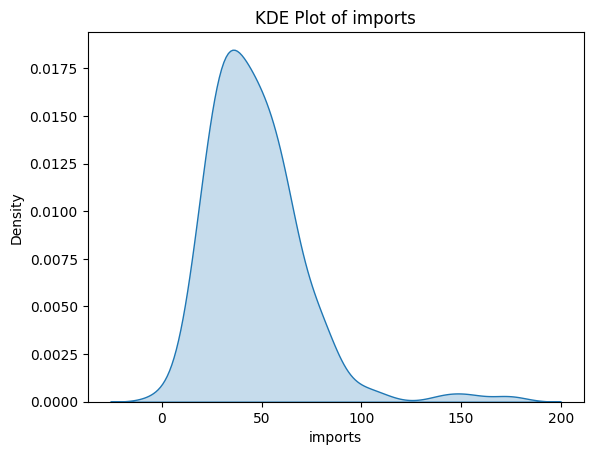

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




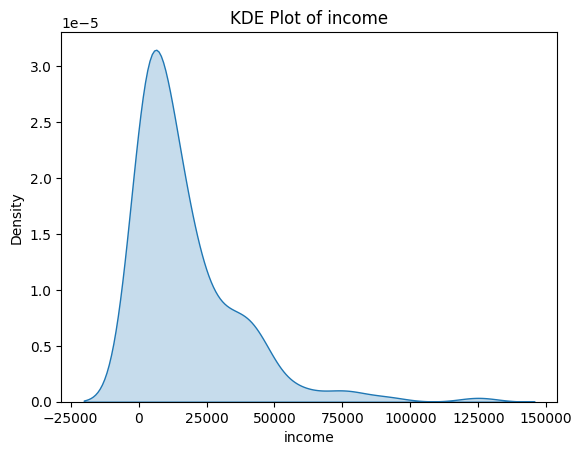

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




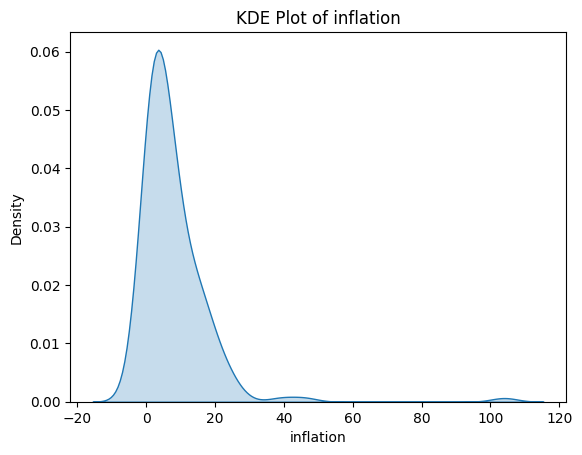

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




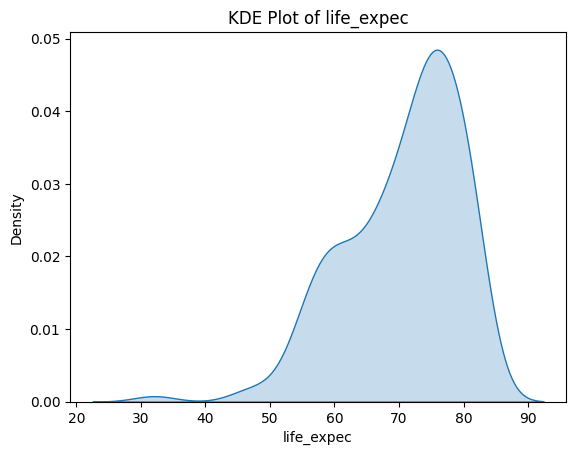

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




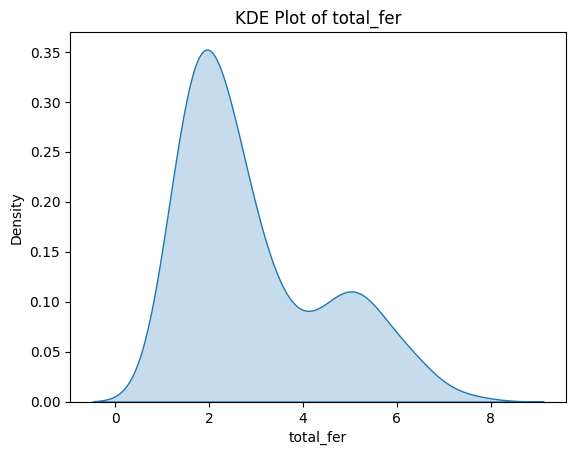

<ipython-input-242-cfcf78456ade>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




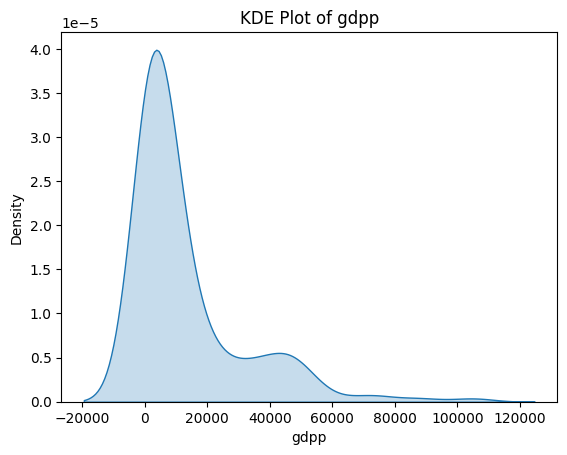

In [242]:
# List of variables to plot
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create KDE plots for each variable
for var in variables:
    plt.figure()
    sns.kdeplot(df[var], shade=True)
    plt.title(f'KDE Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

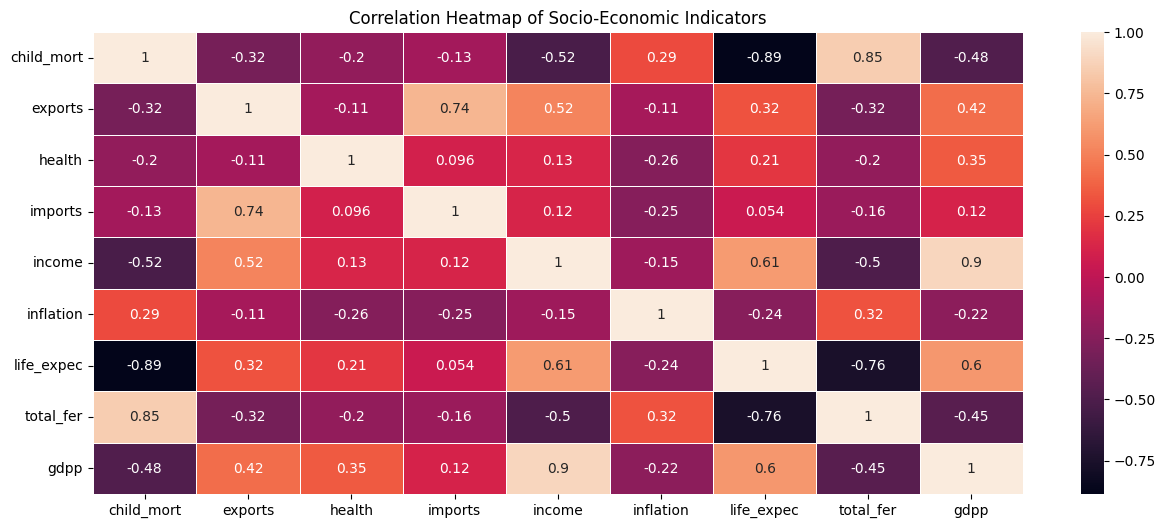

In [243]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Socio-Economic Indicators')
plt.yticks(rotation=0)

# Show the plot
plt.show()

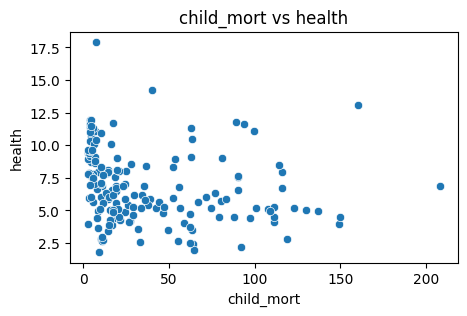

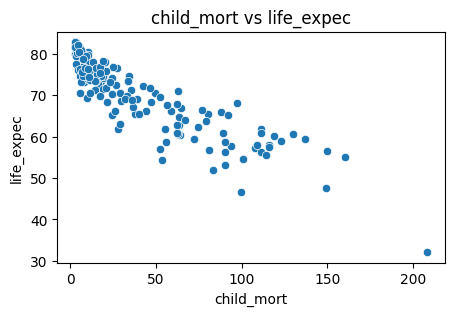

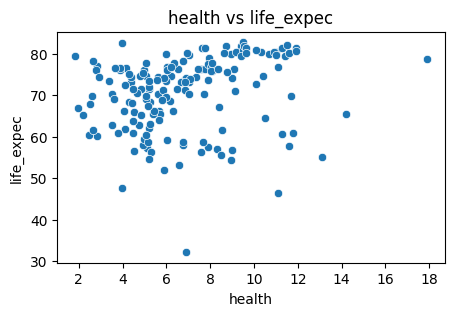

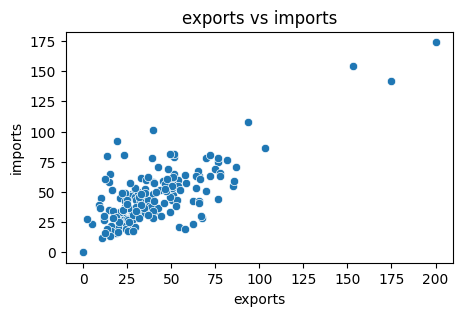

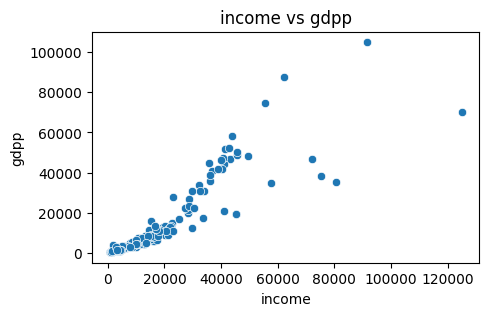

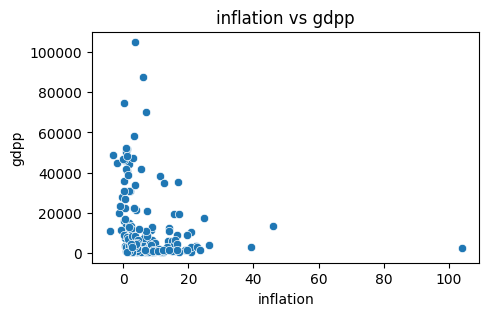

In [244]:
pairs = [
    ('child_mort', 'health'),
    ('child_mort', 'life_expec'),
    ('health', 'life_expec'),
    ('exports', 'imports'),
    ('income', 'gdpp'),
    ('inflation', 'gdpp')
]

# Create scatter plots for each pair of variables
for x, y in pairs:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# **HYPOTHESIS TESTING**

In [245]:
from scipy import stats

In [246]:
#####################  Health Spending and Life Expectancy : Hypothesis testing #####################

# Define a threshold for high vs. low health spending
threshold = df['health'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the health spending threshold
high_health_spending = df[df['health'] > threshold]['life_expec']
low_health_spending = df[df['health'] <= threshold]['life_expec']

# Conduct a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between countries with high and low health spending.")

T-statistic: 2.934
P-value: 0.004
Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.


Correlation coefficient between Total_fertility and Income: -0.502


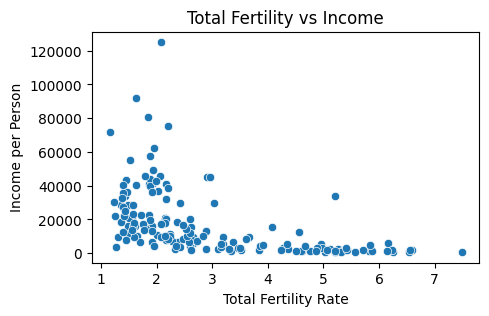

In [247]:
#####################  Fertility and Development  #####################
# Calculate the correlation coefficient
correlation = df['total_fer'].corr(df['income'])
print(f"Correlation coefficient between Total_fertility and Income: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='total_fer', y='income')
plt.title('Total Fertility vs Income')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Income per Person')
plt.show()

In [248]:
#####################  Fertility and Development : Hypothesis testing #####################
# Define a threshold for high vs. low fertility
threshold = df['total_fer'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the fertility threshold
high_fertility = df[df['total_fer'] > threshold]['income']
low_fertility = df[df['total_fer'] <= threshold]['income']

# Conduct a t-test to compare the means of income
t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between countries with high and low fertility rates.")

T-statistic: -8.085
P-value: 0.000
Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.


Pearson correlation coefficient between Income and Child Mortality: -0.524


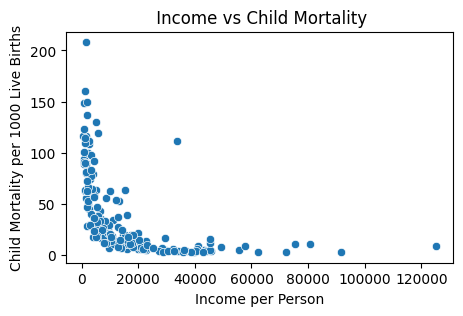

In [249]:
#####################  Income and Child Mortality   #####################
correlation = df['income'].corr(df['child_mort'])
print(f"Pearson correlation coefficient between Income and Child Mortality: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='income', y='child_mort')
plt.title(' Income vs Child Mortality')
plt.xlabel('Income per Person')
plt.ylabel('Child Mortality per 1000 Live Births')
plt.show()

In [250]:
#####################  Income and Child Mortality : Hypothesis testing   #####################
# Define a threshold for high vs. low income
threshold = df['income'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the income threshold
high_income = df[df['income'] > threshold]['child_mort']
low_income = df[df['income'] <= threshold]['child_mort']

# Conduct a t-test to compare the means of child mortality rates
t_stat, p_value = stats.ttest_ind(high_income, low_income)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in child mortality rates between countries with high and low income.")

T-statistic: -10.186
P-value: 0.000
Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.


Pearson correlation coefficient between Inflation and GDP per capita: -0.222


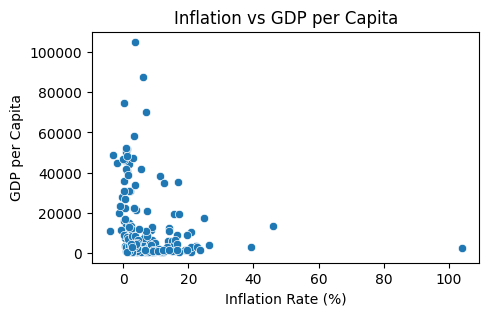

In [251]:
#####################  Inflation and Economic Stability  #####################
correlation = df['inflation'].corr(df['gdpp'])
print(f"Pearson correlation coefficient between Inflation and GDP per capita: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='inflation', y='gdpp')
plt.title('Inflation vs GDP per Capita')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP per Capita')
plt.show()

In [252]:
#####################  Inflation and Economic Stability : Hypothesis testing   #####################
# Define a threshold for high vs. low inflation
threshold = df['inflation'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the inflation threshold
high_inflation = df[df['inflation'] > threshold]['gdpp']
low_inflation = df[df['inflation'] <= threshold]['gdpp']

# Conduct a t-test to compare the means of GDP per capita
t_stat, p_value = stats.ttest_ind(high_inflation, low_inflation)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GDP per capita between countries with high and low inflation.")

T-statistic: -3.688
P-value: 0.000
Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.


# **FEATURE ENGINEERING**

In [253]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [254]:
# Function to apply for BoxCox transformation
def transformer(data,function):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            if function == boxcox:
                data[col], lam_val = function(data[col] + abs(df.min().min())+0.001)
                lam.append(lam_val)
            else:
                data[col] = function(data[col] + abs(df.min().min())+0.001)
                # inflation is the only feature with negative values; to make the log transform possible,
                ## I added the lowest value of inflation +0.001 to make all values positive
    if function == boxcox:
        return data, lam
    else:
        return data

In [255]:
bc_data = df.copy()
bc_data, lambda_list = transformer(bc_data, boxcox) #storing the lambda values of boxcox transform in a separate list
bc_data.skew()

,0
child_mort,0.062932
exports,0.030569
health,0.705746
imports,0.069233
income,-0.035718
inflation,0.418363
life_expec,-0.182170
total_fer,0.199942
gdpp,0.001558


In [256]:
print('BoxCox transformed Correlation Matrix')
corr_matrix(bc_data)

BoxCox transformed Correlation Matrix


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,,,,,-0.858853,,-0.913547,0.87042,-0.875005
exports,,,,,,,,,
health,,,,,,,,,
imports,,,,,,,,,
income,-0.858853,,,,,,0.838438,-0.750676,0.974396
inflation,,,,,,,,,
life_expec,-0.913547,,,,0.838438,,,-0.786441,0.849259
total_fer,0.87042,,,,-0.750676,,-0.786441,,-0.733234
gdpp,-0.875005,,,,0.974396,,0.849259,-0.733234,


In [257]:
log_data = df.copy(deep=True)
log_data = transformer(log_data, np.log)
log_data.skew()

,0
child_mort,0.241073
exports,-0.358373
health,0.705746
imports,-0.646111
income,-0.234644
inflation,-5.283491
life_expec,-1.579032
total_fer,0.725025
gdpp,0.009090


In [258]:
sqrt_data = df.copy()
sqrt_data = transformer(sqrt_data, np.sqrt)
sqrt_data.skew()

,0
child_mort,0.812560
exports,0.966607
health,0.705746
imports,0.725291
income,0.857148
inflation,1.779440
life_expec,-1.232322
total_fer,0.844463
gdpp,1.143604


In [259]:
comp_matrix = pd.concat([corr_matrix(bc_data), corr_matrix(log_data).rename(columns=\
                                                                            {old:str('log-'+old)\
                                                                             for old in corr_matrix(log_data).columns})],\
                        axis=1)

comp_matrix = pd.concat([comp_matrix, corr_matrix(sqrt_data).rename(columns={old:str('sqrt-'+old)\
                                                                             for old in corr_matrix(sqrt_data).columns})],\
                        axis=1)

for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:0 if x == '' else x)

for bc,log,sqrt in zip(comp_matrix.columns[:9],comp_matrix.columns[9:-9],comp_matrix.columns[-9:]):
    comp_matrix[bc] = comp_matrix[[bc,log,sqrt]].apply(lambda x: 'boxcox' if abs(x[0]) > abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) > abs(x[1]) and abs(x[0]) < abs(x[2])\
                                                       else 'log' if abs(x[1]) > abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) > abs(x[0]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[2]) > abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) > abs(x[0]) and abs(x[2]) < abs(x[1])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) < abs(x[1])\
                                                       else '', axis=1)

comp_matrix.drop(comp_matrix.columns[-18:], axis=1, inplace=True)
print('Correlation Cefficient Comparison Matrix:')
comp_matrix

Correlation Cefficient Comparison Matrix:


<ipython-input-259-63735213b97c>:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-259-63735213b97c>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-259-63735213b97c>:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-259-63735213b97c>:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,,,,,log,,boxcox,sqrt,boxcox
exports,,,,,,,,,
health,,,,,,,,,
imports,,,,,,,,,
income,log,,,,,,boxcox,log,boxcox
inflation,,,,,,,,,
life_expec,boxcox,,,,boxcox,,,boxcox,boxcox
total_fer,sqrt,,,,log,,boxcox,,log
gdpp,boxcox,,,,boxcox,,boxcox,log,


In [260]:
for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:np.nan if x == '' else x)

boxcox=[]
log=[]
sqrt=[]

for col in comp_matrix.columns:
    try:

        boxcox.append(comp_matrix[col].value_counts().loc['boxcox'])
    except:
        boxcox.append(0)
    try:
        log.append(comp_matrix[col].value_counts().loc['log'])
    except:
        log.append(0)
    try:
        sqrt.append(comp_matrix[col].value_counts().loc['sqrt'])
    except:
        log.append(0)
print('Boxcox Transformation highest correlation coefficients:', int(sum(boxcox)/2))
print('Log Transformation highest correlation coefficient:', int(sum(log)/2))
print('Square Root Transformation highest correlation coefficient:', int(sum(sqrt)/2))

Boxcox Transformation highest correlation coefficients: 6
Log Transformation highest correlation coefficient: 3
Square Root Transformation highest correlation coefficient: 1


The BoxCox Transformation proved to be the most effective type of transformation.

I'll use BoxCox transformation on the dataset to bring the data distribution closer to the known Gaussian distribution, and strengthen the linear correlations between the features.

In [261]:
# display the values of boxcox lambdas
cols = []
for i in range(len(df.skew().index)):
    if abs(df.skew()[i]) > 0.75:
        cols.append(df.skew().index[i])

lambda_values = pd.Series(dict(zip(cols, lambda_list)))
print('Lambda values used in BoxCox transformation per data feature:')
lambda_values

Lambda values used in BoxCox transformation per data feature:


<ipython-input-261-4fa4b8937b30>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,0
child_mort,-0.163454
exports,0.142427
imports,0.232995
income,0.097441
inflation,0.288592
life_expec,3.911049
total_fer,-2.317588
gdpp,-0.003218


# **Feature Scaling**

In [262]:
bc_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000
mean,2.524776,4.844862,6.815689,6.251297,14.862237,3.291616,5.851172e+06,0.426303,8.383146
std,0.534895,0.939880,2.746837,1.111199,2.964398,1.373132,2.293187e+06,0.001998,1.457027
min,1.646846,1.626900,1.810000,1.729543,8.919017,-2.993101,3.229180e+05,0.422675,5.412789
25%,2.066908,4.265022,4.920000,5.496081,12.376412,2.352180,4.093251e+06,0.424714,7.113307
50%,2.466485,4.818866,6.320000,6.260140,14.906636,3.190764,6.204560e+06,0.426083,8.333888
75%,3.035741,5.421425,8.600000,6.975568,17.021319,4.099667,7.449306e+06,0.428090,9.404663
max,3.569427,7.955873,17.900000,10.066584,21.941206,9.925202,9.850910e+06,0.430040,11.349324


Even after the BoxCox transformation, features are on different scales.

In [263]:
scaled_ds = StandardScaler().fit_transform(bc_data)
scaled_ds

array([[ 1.28244392, -1.72835389,  0.27908825, ..., -1.52502272,
         1.564927  , -1.46221156],
       [-0.24719848, -0.37672276, -0.09701618, ...,  0.62105489,
        -0.9957475 , -0.12124937],
       [ 0.21074304,  0.12279285, -0.96607302, ...,  0.65206496,
         0.29520076, -0.0632716 ],
       ...,
       [ 0.0642978 ,  1.22660376,  0.0088773 , ...,  0.15456666,
        -0.6029282 , -0.88423217],
       [ 0.87101873, -0.27085693, -0.59727159, ..., -0.53686048,
         1.2274897 , -0.88423217],
       [ 1.21228386,  0.06210147, -0.33801514, ..., -1.77901603,
         1.45707963, -0.81154276]])

# **MODEL BUILDING**

**Using K-MEANS**

*   Inertia is defined as: the sum of the intracluster distances where an intracluster distance is the sum of squared distances from each point to its cluster centroid.

*   Distortion is defined as: the average of the mean squared distance from each point to the centroid of the respective clusters (I create a function, the distortion_function(), to calculate the Distortion)



In [264]:
def distortion_function(k, dataset, init='k-means++', random_state=98, n_init=10):
    km = KMeans(init=init, n_clusters=k, random_state=random_state, n_init=n_init)
    km.fit(dataset)
    dist_matrix = pd.DataFrame(columns=['Cluster', 'Distance'])
    for x in range(len(dataset)):
        dist_matrix = pd.concat([dist_matrix, pd.DataFrame({'Cluster': [km.labels_[x]], 'Distance': [((dataset[x] - km.cluster_centers_[km.labels_[x]])**2).sum()]})], ignore_index=True)
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    return distortion

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98, n_init=10)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds, n_init=10))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getit

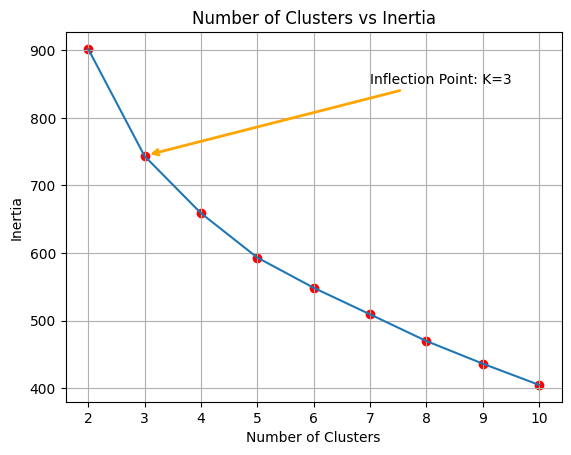

In [265]:
# Inertia
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,745),
             xytext=(7,850),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

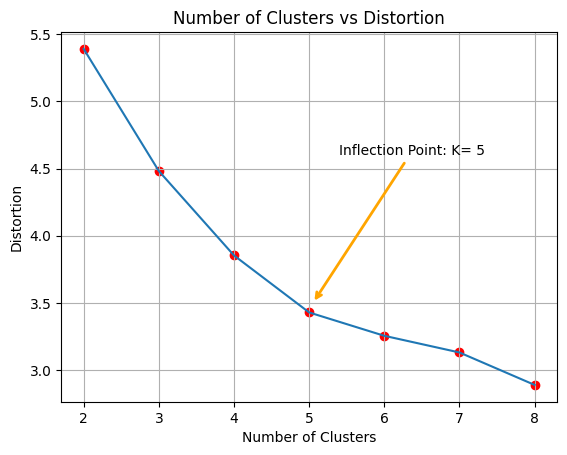

In [266]:
# Distortion
plt.plot(range(2,9), distortion[:7])
plt.scatter(range(2,9),distortion[:7], color='red')
plt.annotate('Inflection Point: K= 5',
             xy=(5.05,3.5),
             xytext=(5.4,4.6),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.title('Number of Clusters vs Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

Based on the Inertia/Distortion analysis, I'll retrain the model with number of clusters = 3, 4, and 5

In [267]:
def cluster_boxplots(scaled_dataset, original_dataset, k=2, plot_size=(14,11), add_info=''):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_dataset)
    original_dataset['cluster'] = km.labels_

    fig = plt.figure(figsize=plot_size)
    child_mort = fig.add_subplot(3,3,1) # or fig.add_subplot(xyz)
    exports = fig.add_subplot(3,3,2)
    health = fig.add_subplot(3,3,3)
    imports = fig.add_subplot(3,3,4)
    income = fig.add_subplot(3,3,5)
    inflation = fig.add_subplot(3,3,6)
    life_expec = fig.add_subplot(3,3,7)
    total_fer = fig.add_subplot(3,3,8)
    gdpp = fig.add_subplot(3,3,9)

    #subplot 1
    sns.boxplot(x='cluster', y='child_mort', data=original_dataset, ax=child_mort)
    child_mort.set_xlabel('')

    #subplot 2
    sns.boxplot(x='cluster', y='exports', data=original_dataset, ax=exports)
    exports.set_xlabel('')

    #subplot 3
    sns.boxplot(x='cluster', y='health', data=original_dataset, ax=health)
    health.set_xlabel('')

    #subplot 4
    sns.boxplot(x='cluster', y='imports', data=original_dataset, ax=imports)
    imports.set_xlabel('')

    #subplot 5
    sns.boxplot(x='cluster', y='income', data=original_dataset, ax=income)
    income.set_xlabel('')

    #subplot 6
    sns.boxplot(x='cluster', y='inflation', data=original_dataset, ax=inflation)
    inflation.set_xlabel('')

    #subplot 7
    sns.boxplot(x='cluster', y='life_expec', data=original_dataset, ax=life_expec)
    life_expec.set_xlabel('')

    #subplot 8
    sns.boxplot(x='cluster', y='total_fer', data=original_dataset, ax=total_fer)
    total_fer.set_xlabel('')

    #subplot 9
    sns.boxplot(x='cluster', y='gdpp', data=original_dataset, ax=gdpp)
    gdpp.set_xlabel('')

    fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k,add_info), fontsize=14)
    plt.tight_layout(pad=2)
    plt.show()

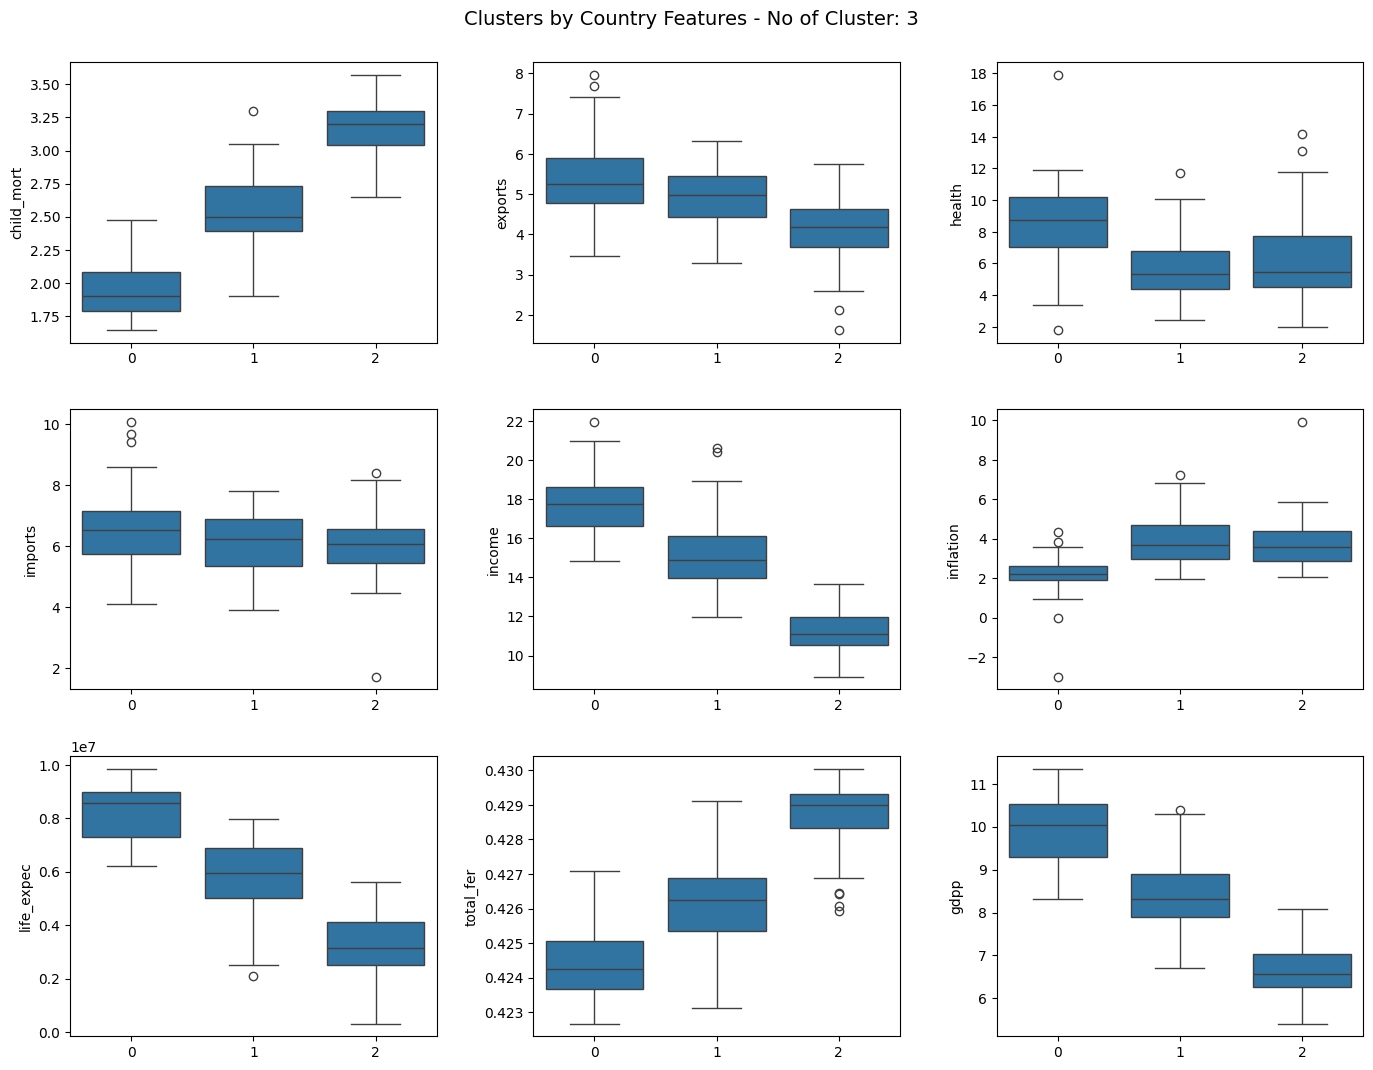

In [268]:
cluster_boxplots(scaled_ds,bc_data, k=3)

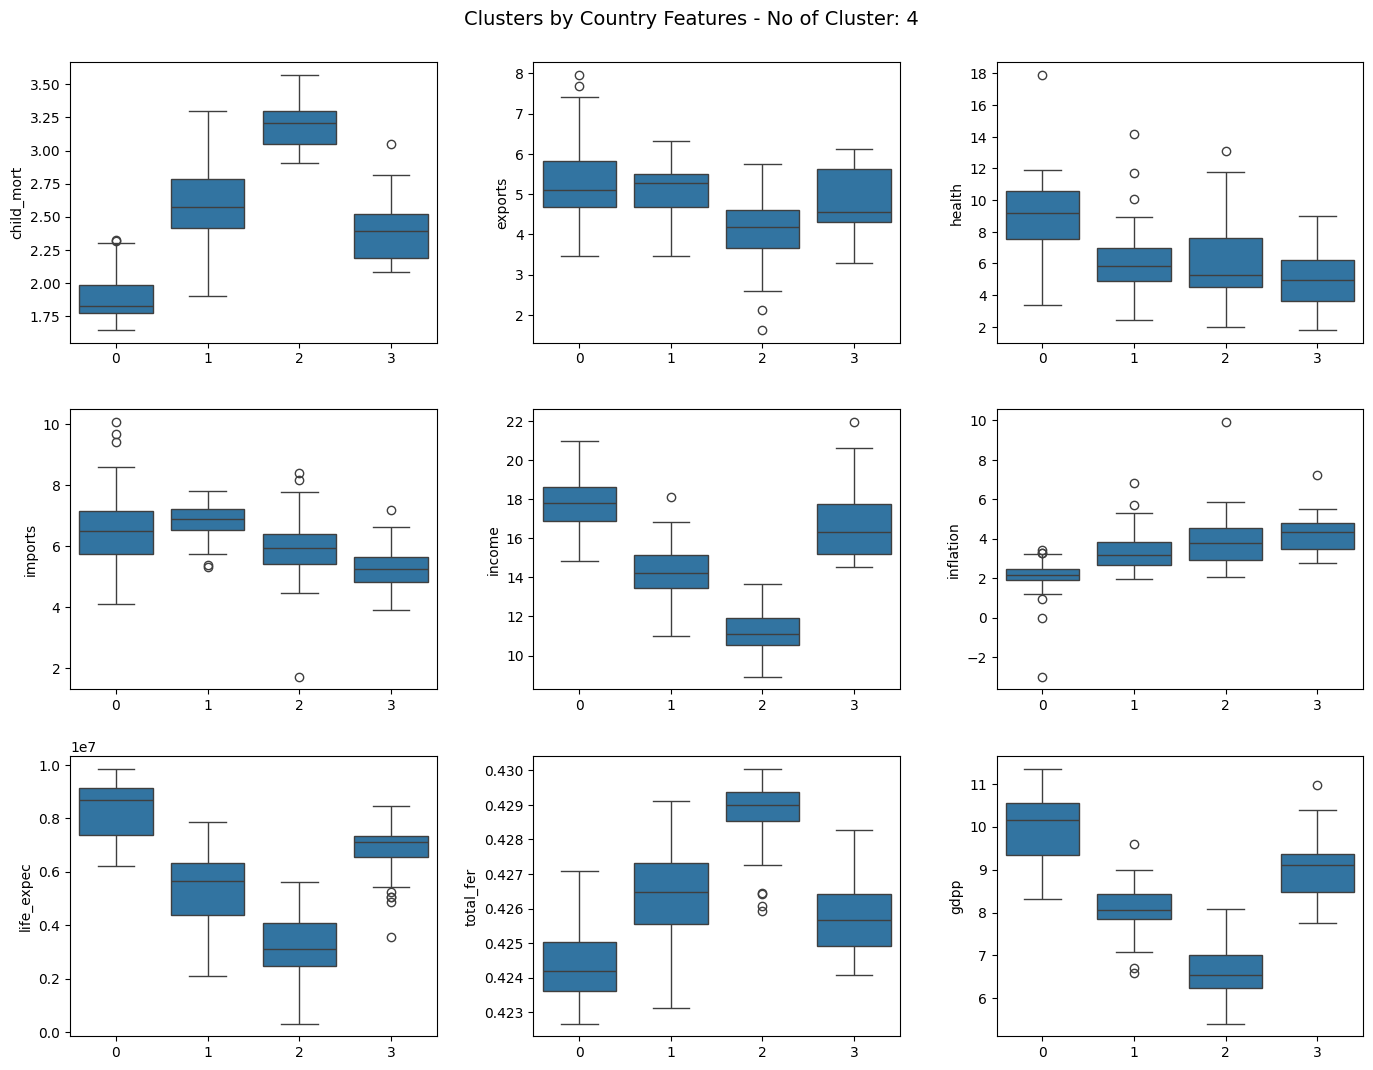

In [269]:
cluster_boxplots(scaled_ds, bc_data, k=4)

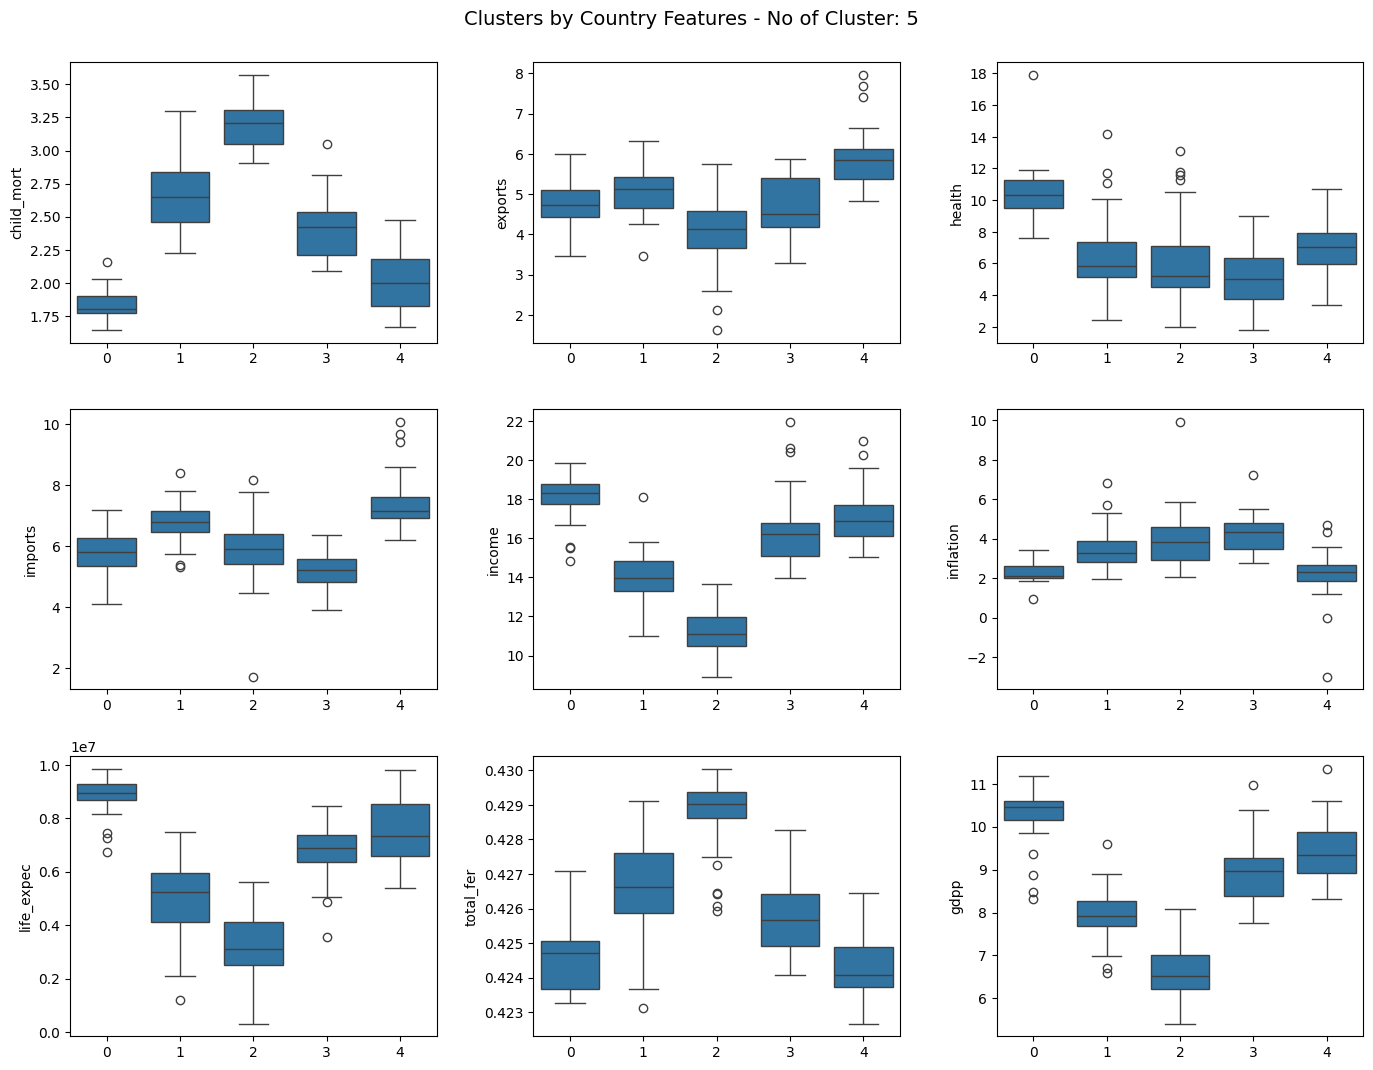

In [270]:
cluster_boxplots(scaled_ds, bc_data, k=5)

There's clear overlapping between the clusters in following variables stating these are not significant features for clustering :

*   imports
*   health
*   exports
*   inflation

When the number of cluster is 3, we can see (more or less) distinct clusters for all other features (the significant features):

*   child_mort
*   income
*   life_expec
*   total_fe
*   gdpp

Hence 3 is the greatest number of distinct meaningful clusters we can achieve with K-means, using all data features.

# **PRINCIPLE COMPONENT ANALYSIS**

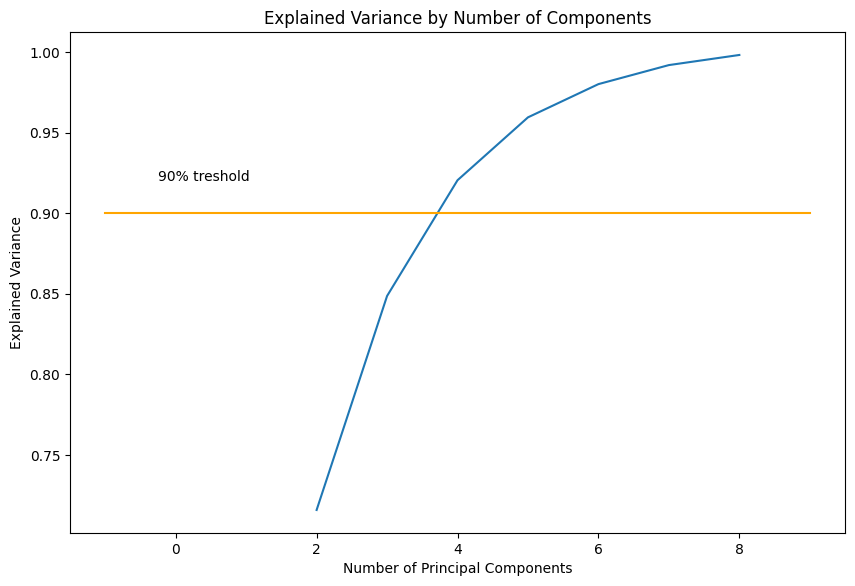

In [271]:
# Applying PCA
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,9):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_ds)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())


expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='line',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,10), np.full((11,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

If we reduce the dimensionality from 9 features to 4 components, we still can maintain more than 90% of the original variance. I choose 4 as number of new components, and retrain the k-means algorithm on the dimension-reduced dataset

In [272]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_ds)

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=pca_data))
    silhouette.append(silhouette_score(pca_data, km.labels_))

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getit

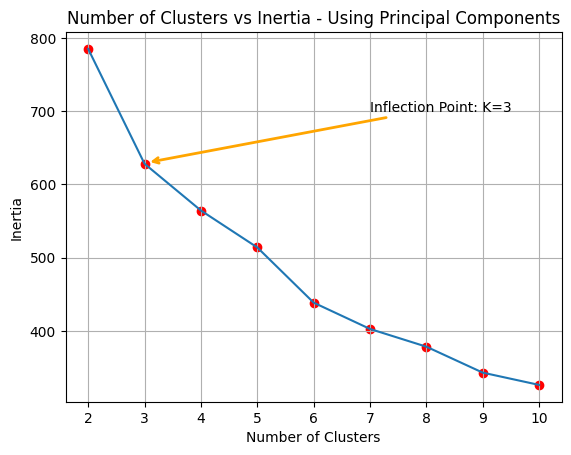

In [273]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,630),
             xytext=(7,700),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

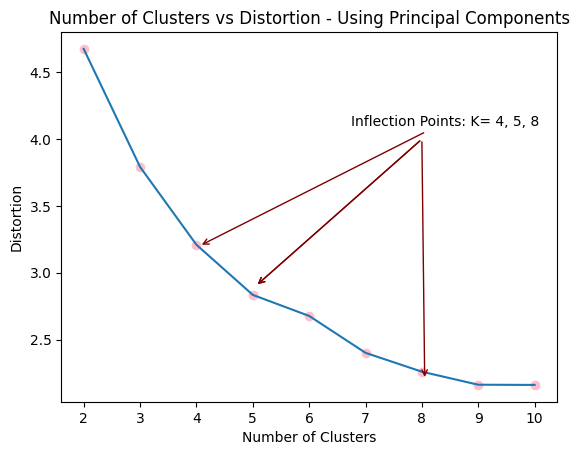

In [274]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='pink')
plt.annotate('Inflection Points: K= 4, 5, 8',
              xy=(4.05,3.2),
              xytext=(6.75,4.1),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(8.05,2.2),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.title('Number of Clusters vs Distortion - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.show()

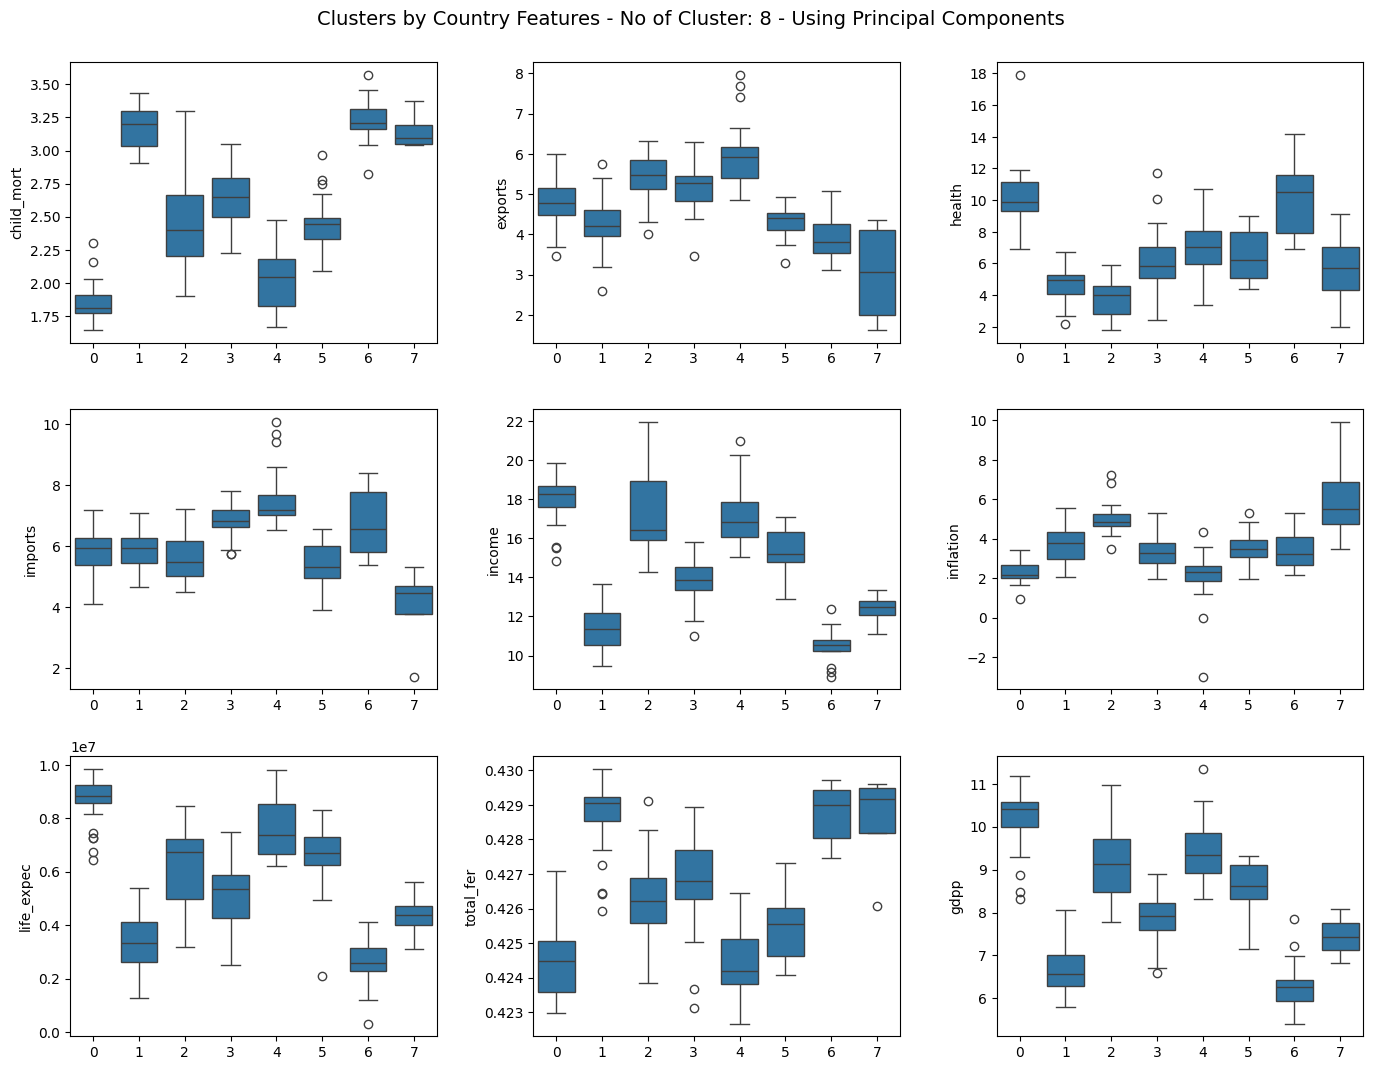

In [275]:
cluster_boxplots(pca_data, bc_data, k=8, add_info=' - Using Principal Components')

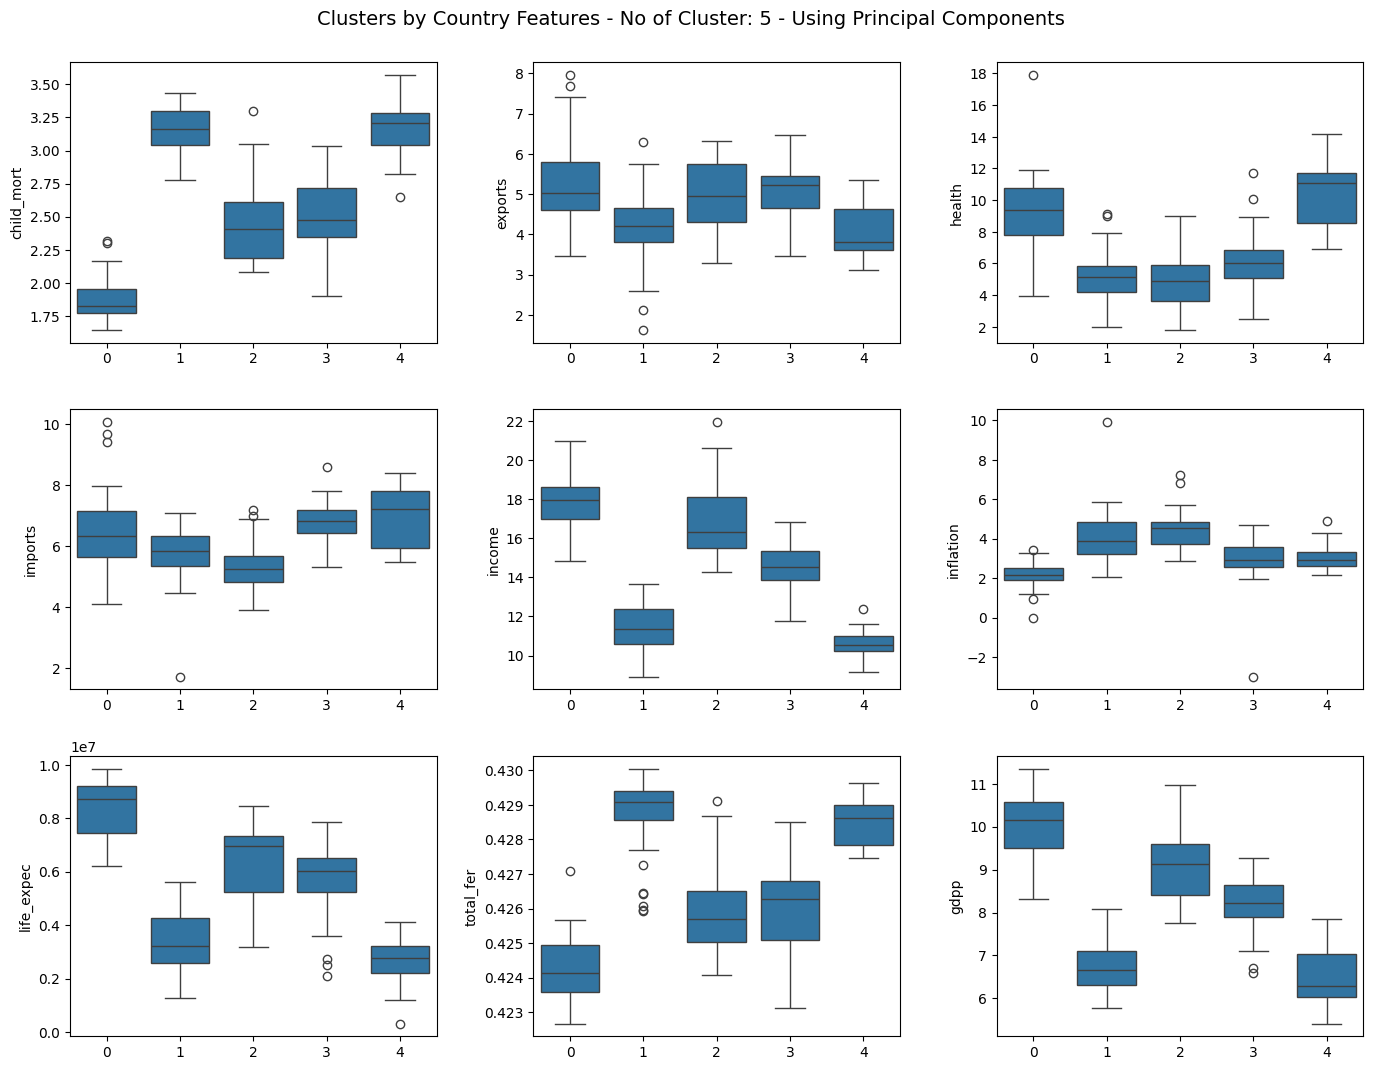

In [276]:
cluster_boxplots(pca_data, bc_data, k=5, add_info=' - Using Principal Components')

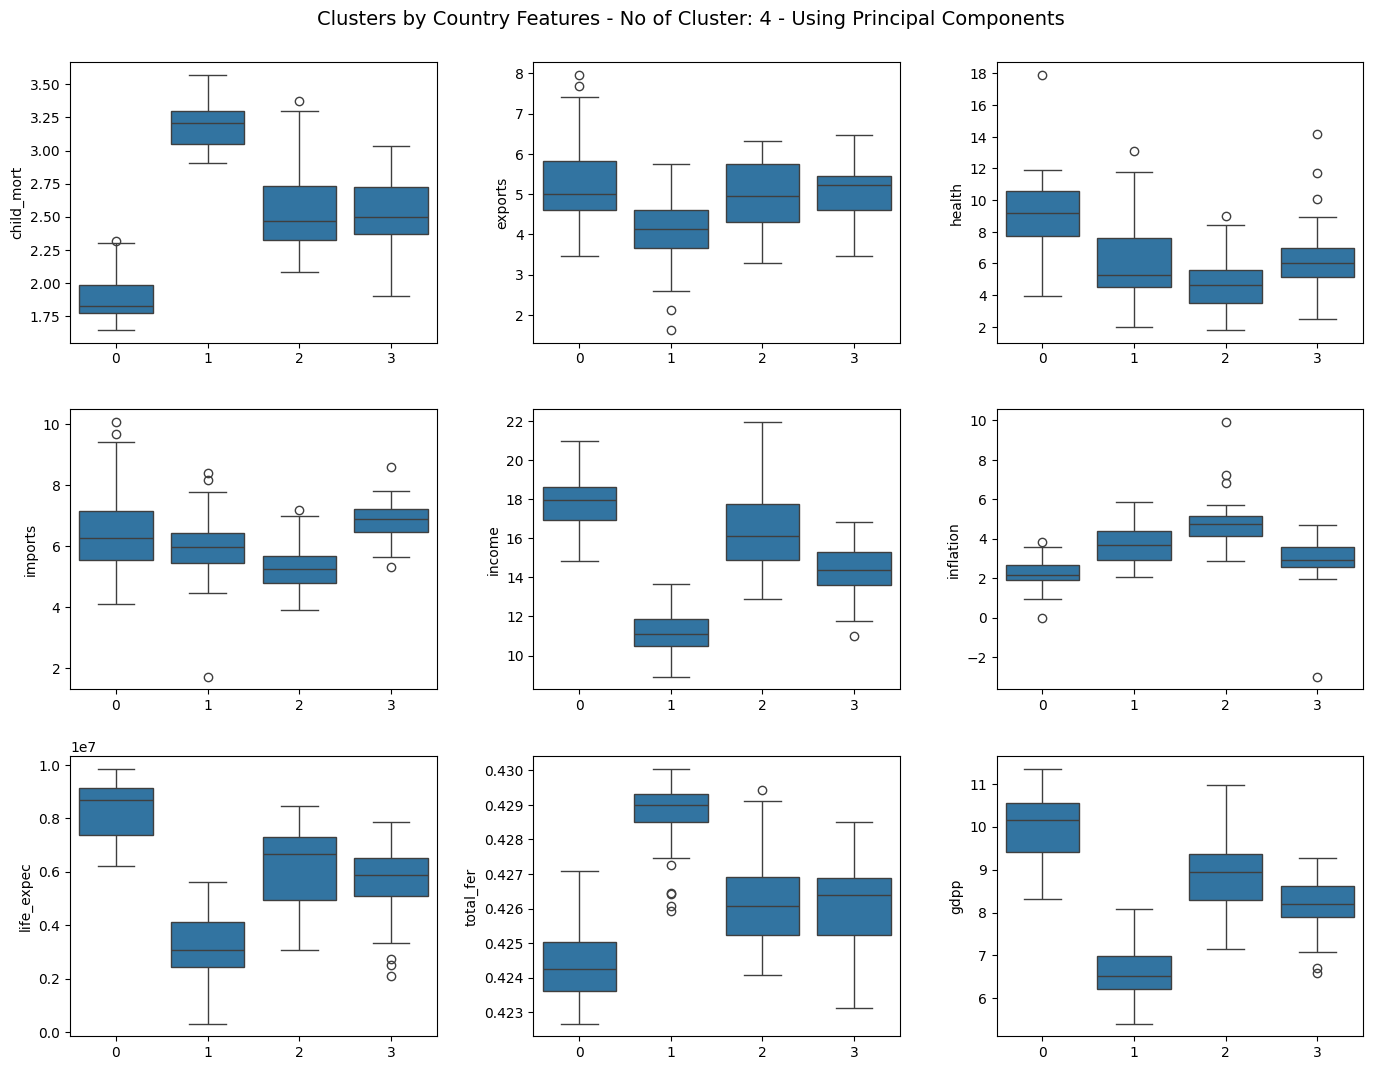

In [277]:
cluster_boxplots(pca_data, bc_data, k=4, add_info=' - Using Principal Components')

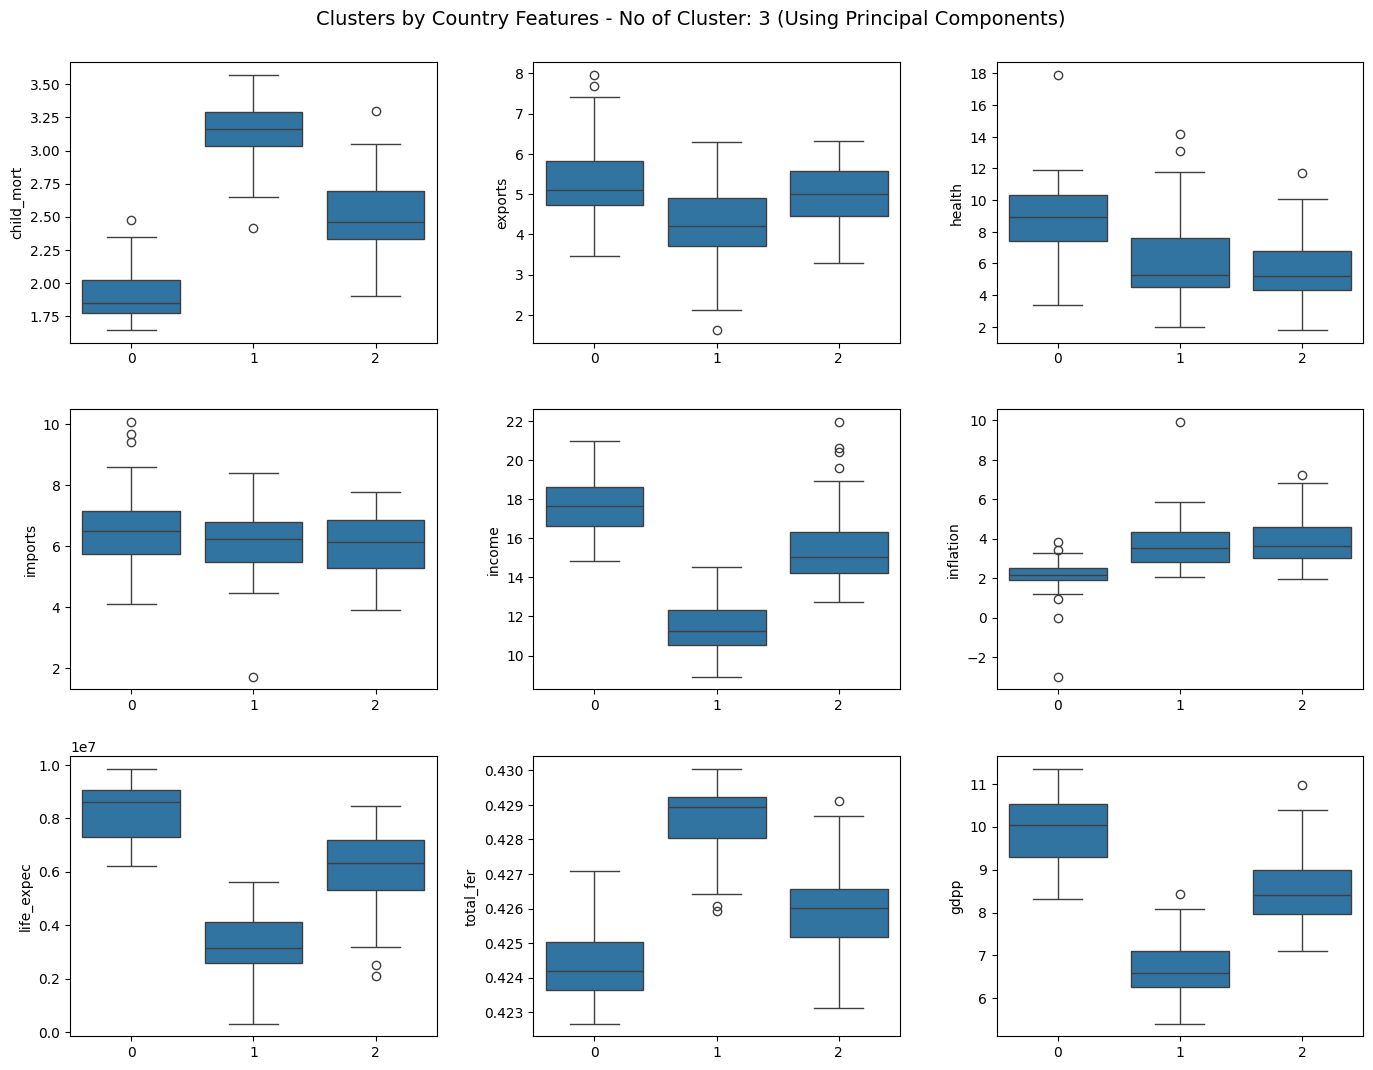

In [278]:
cluster_boxplots(pca_data, bc_data, k=3, add_info=' (Using Principal Components)')

It seems that even when using Principal Component Analysis technique, the best greatest number of clusters to avoid cluster's overlapping is 3.

In [279]:
# silhouette Score when number of cluster is kept 3

silhouette={'Dataset':[], 'Silhouette_Score':[]}
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
silhouette['Dataset'].append('Original number of features')
silhouette['Silhouette_Score'].append(silhouette_score(scaled_ds, km.labels_))
km.fit(pca_data)
silhouette['Dataset'].append('PCA')
silhouette['Silhouette_Score'].append(silhouette_score(pca_data, km.labels_))
pd.DataFrame(silhouette['Silhouette_Score'], index=silhouette['Dataset'], columns=['Silhouette_Score'])

,Silhouette_Score
Original number of features,0.245922
PCA,0.279659


**Feature Selection**

In [280]:
# Deleting the features where the clusters significantly overlap
slct_ds = bc_data.drop(['health', 'imports', 'inflation', 'exports', 'cluster'], axis=1)
slct_ds_scld = StandardScaler().fit_transform(slct_ds)

In [281]:
inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(slct_ds_scld)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=slct_ds_scld))
    silhouette.append(silhouette_score(slct_ds_scld, km.labels_))

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-264-641a798d9931>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

<ipython-input-264-641a798d9931>:7: FutureWarning:

Series.__getit

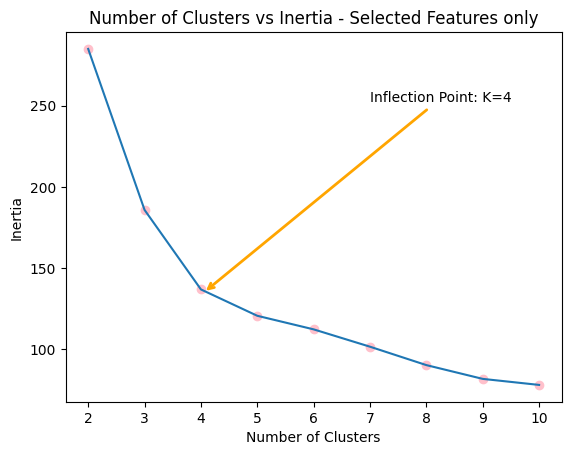

In [282]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='pink')
plt.title('Number of Clusters vs Inertia - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.annotate('Inflection Point: K=4',
              xy=(4.05,135),
              xytext=(7,252),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

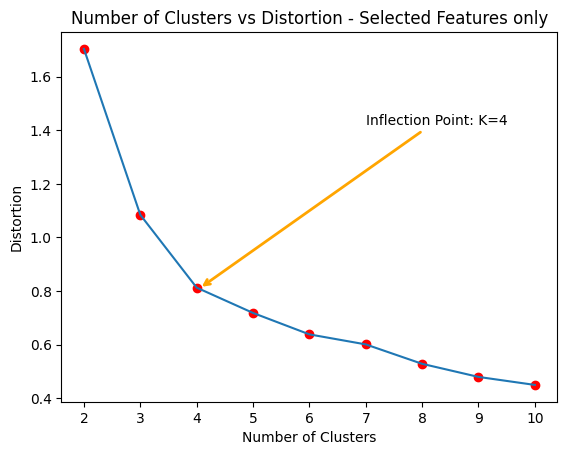

In [283]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='red')
plt.title('Number of Clusters vs Distortion - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.annotate('Inflection Point: K=4',
              xy=(4.05,0.81),
              xytext=(7,1.42),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))

plt.show()

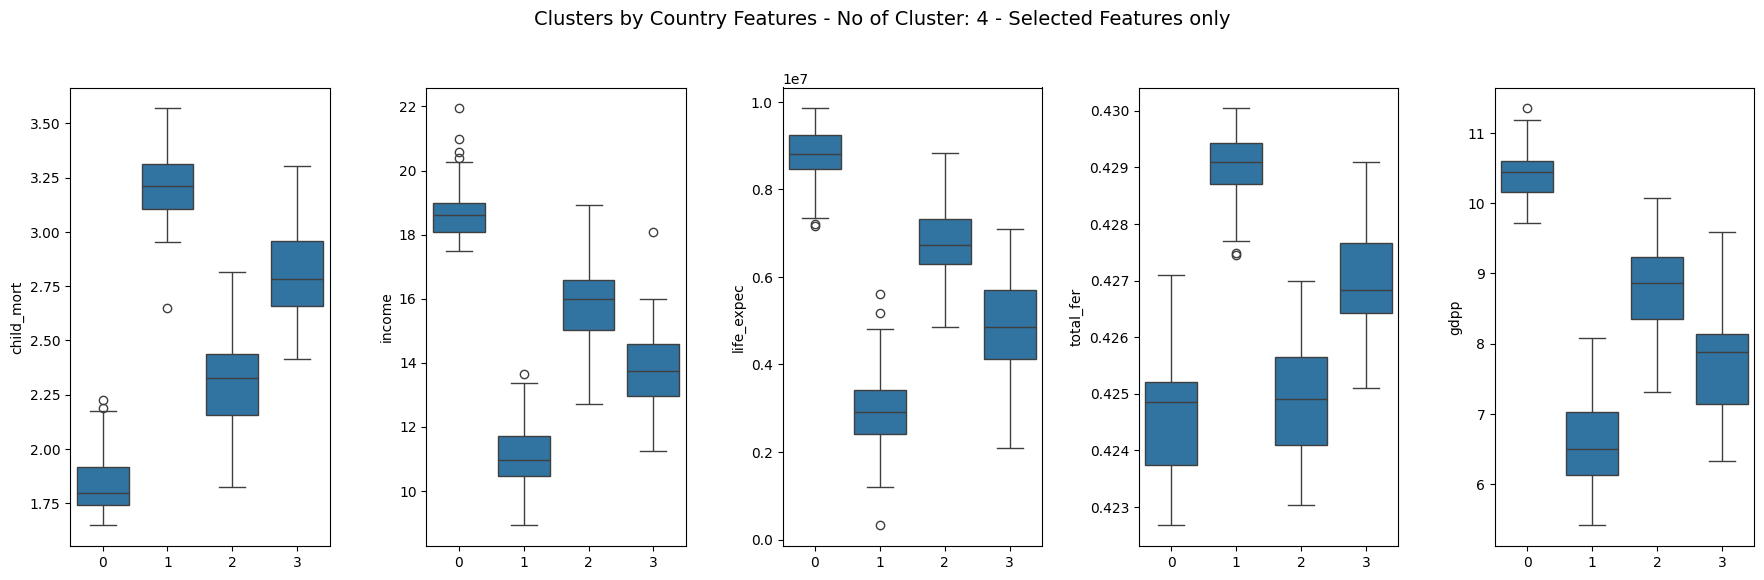

In [284]:
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
slct_ds['cluster'] = km.labels_

fig = plt.figure(figsize=(18,6))
child_mort = fig.add_subplot(1,5,1)
income = fig.add_subplot(1,5,2)
life_expec = fig.add_subplot(1,5,3)
total_fer = fig.add_subplot(1,5,4)
gdpp = fig.add_subplot(1,5,5)

sns.boxplot(x='cluster', y='child_mort', data=slct_ds, ax=child_mort)
child_mort.set_xlabel('')

sns.boxplot(x='cluster', y='income', data=slct_ds, ax=income)
income.set_xlabel('')

sns.boxplot(x='cluster', y='life_expec', data=slct_ds, ax=life_expec)
life_expec.set_xlabel('')

sns.boxplot(x='cluster', y='total_fer', data=slct_ds, ax=total_fer)
total_fer.set_xlabel('')

sns.boxplot(x='cluster', y='gdpp', data=slct_ds, ax=gdpp)
gdpp.set_xlabel('')

fig.suptitle('Clusters by Country Features - No of Cluster: 4 - Selected Features only', fontsize=14)
plt.tight_layout(pad=2)
plt.show()

# **Hierarchical Agglomerative Clustering**

**Hierarchical Agglomerative Clustering with Euclidean Distance**

Linkage: ward - minimizing the intra-cluster inertia

In [285]:
# Hierarchical Agglomerative Clustering algorithm - plotting the dendrogram

def plot_dendrogram(model, p=50, dend_title='Hierarchical Clustering Dendrogram', size=(16,6), x_line=0, y_line=0, x_text=0,\
                    y_text=0, text=''):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    plt.figure(figsize=(size))
    den = hierarchy.dendrogram(linkage_matrix, orientation='top', p=p, truncate_mode='lastp', show_leaf_counts=True)
    plt.plot(x_line,y_line, color='orange')
    plt.text(x_text, y_text, text)
    plt.title(dend_title)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    plt.show()

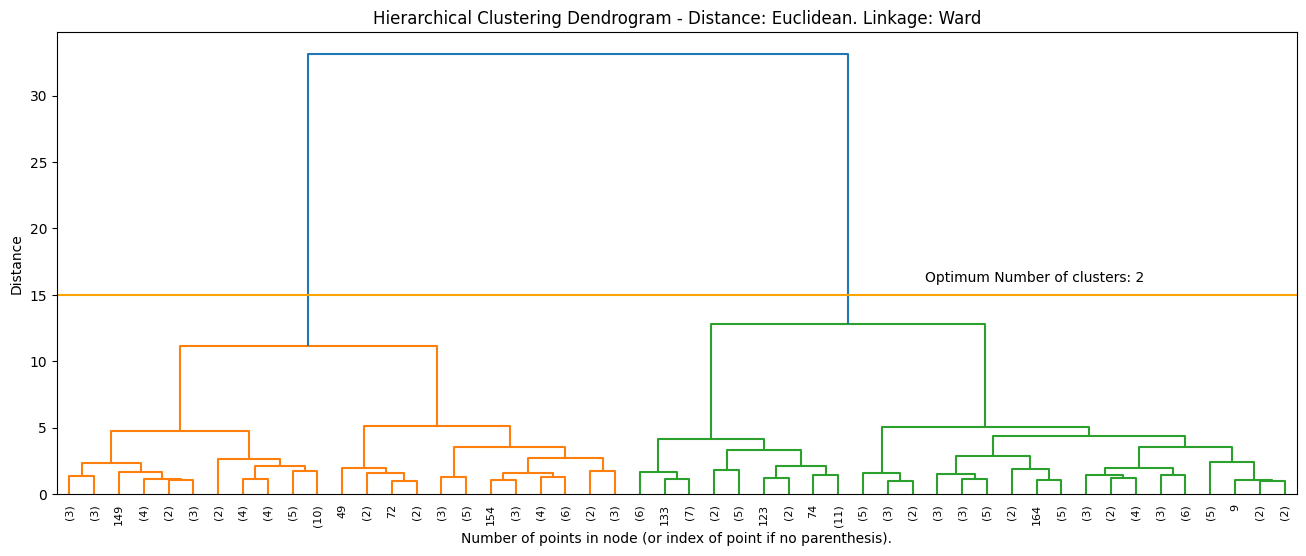

In [286]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Ward', x_line=range(600),
                y_line=np.full((600,), 15), x_text=350, y_text=16, text='Optimum Number of clusters: 2')

If we analyze the dendrogram, we can see that there is a huge jump in distance when going from 4 to 2 clusters. We can conclude that the optimum number of clusters with this parameters (distance: Euclidean; linkage: Ward) is 2.

Since with K-means we were able to cluster our data in 4 distinct clusters, K-means algorithm performs better than Hierarchical Agglomerative Clustering in segmenting our dataset.

I'll try again changing the parameters of the Hierarchical Agglomerative Clustering algorithm.

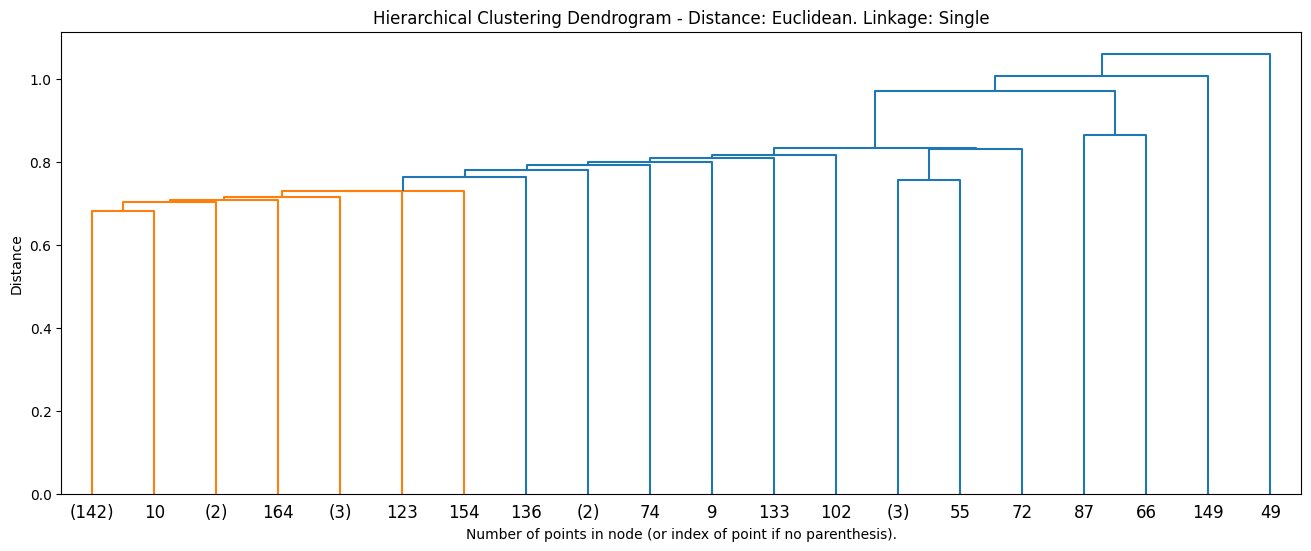

In [287]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single') # Removed affinity argument
hac.fit(slct_ds_scld)
plot_dendrogram(hac, dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Single', p=20)

Single linkage doesn't perform well at all.

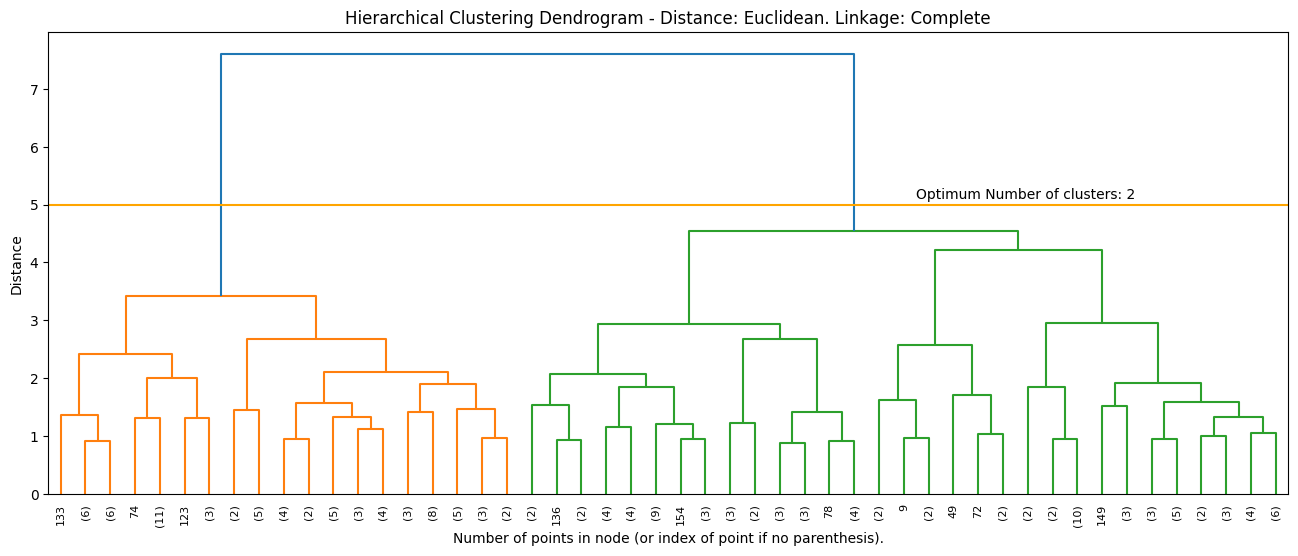

In [288]:
# Linkage: complete - reducing the impact of outliers

hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Complete', x_line=range(600),
                y_line=np.full((600,), 5), x_text=350, y_text=5.1, text='Optimum Number of clusters: 2')

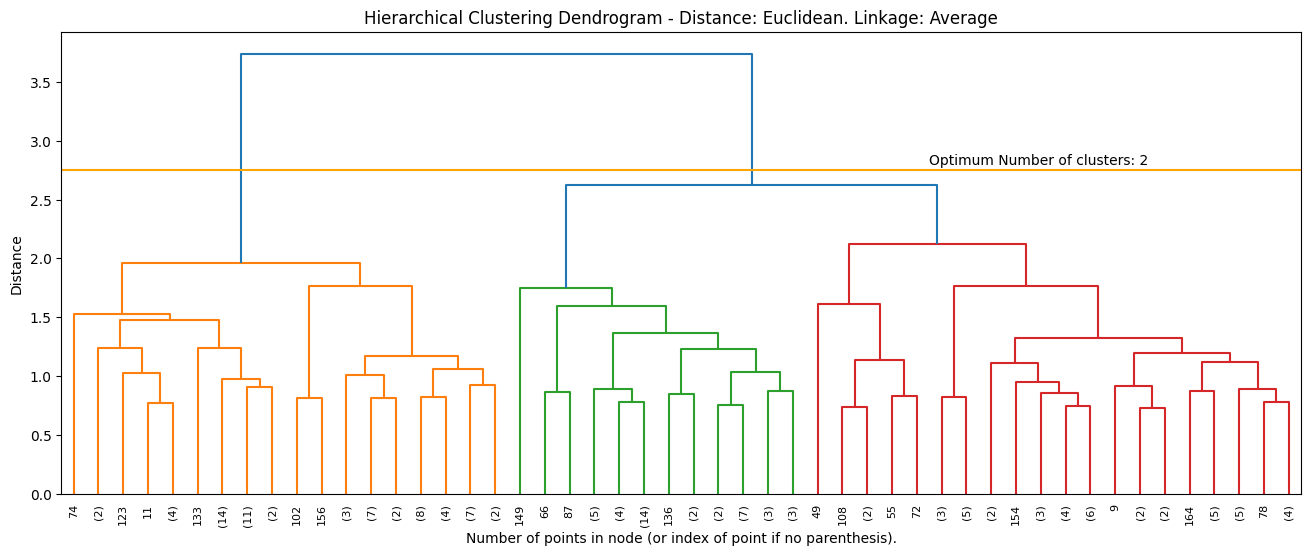

In [289]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='average')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Average', p=50,\
                x_line=range(600), y_line=np.full((600,), 2.75), x_text=350, y_text=2.8, text='Optimum Number of clusters: 2')

With Average linkage the optimum number of clusters is, again, 2.

# **DBSCAN**

In [290]:
radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances:
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(slct_ds_scld)
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(slct_ds_scld, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)

dbscan_perf = pd.DataFrame(dbscan_perf)

In [291]:
np.sort(dbscan_perf['N_Cluster'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [292]:
print("Greatest Silhouette Coeffiecient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coeffiecient per Number of Clusters:


,Silhouette_Coefficient
N_Cluster,
2,0.479489
3,0.405192
4,0.359300
5,0.270852
6,0.188485
7,0.127782
8,0.029490
9,0.054372
10,-0.093637


In [293]:
# Silhouette Coefficient of the K-Means model (4 clusters)  VS  Silhouette Coefficients obtained by DBSCAN.
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
print('K-Means Silhouette Score (4 clusters):', silhouette_score(slct_ds_scld, km.labels_))

K-Means Silhouette Score (4 clusters): 0.3870893715253182


In [294]:
# DBSCAN got higher Silhouette Scores only when clusters equal to 2 or 3
dbscan_perf[dbscan_perf['N_Cluster'] == 2].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
13719,manhattan,3.2,60,2,0.479489


In [295]:
dbscan_perf[dbscan_perf['N_Cluster'] == 3].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
12970,manhattan,2.55,39,3,0.405192


In [296]:
dbs = DBSCAN(eps=2.55, min_samples=39, metric='manhattan')
dbs.fit(slct_ds_scld)
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0,  1]), array([  4, 119,  44]))

We can conclude that **K-Means performed better than either Agglomerative Hierarchical Clustering or DBSCAN**

In [297]:
# Create the clusters
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
km_cluster = pd.DataFrame(slct_ds_scld, index=slct_ds.index, columns=slct_ds.drop('cluster',axis=1).columns)
km_cluster['cluster'] = km.labels_
km_cluster.tail()

,child_mort,income,life_expec,total_fer,gdpp,cluster
country,,,,,,
Vanuatu,0.272908,-0.936370,-0.989652,0.695901,-0.335557,3
Venezuela,-0.220145,0.444224,0.484259,-0.054573,0.677068,2
Vietnam,0.064298,-0.620702,0.154567,-0.602928,-0.884232,3
Yemen,0.871019,-0.622412,-0.536860,1.227490,-0.884232,3
Zambia,1.212284,-0.857910,-1.779016,1.457080,-0.811543,1


In [298]:
# Reduce the dimension to 2 components to visualize clusters on a 2d plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(km_cluster.iloc[:,:-1])
pca_data = pd.DataFrame(pca_data, index=slct_ds.index, columns=['1st Principal Component', '2nd Principal Component'])
pca_data['cluster'] = km.labels_
pca_data.head()

,1st Principal Component,2nd Principal Component,cluster
country,,,
Afghanistan,3.214473,0.149480,1
Albania,-0.762240,-0.854788,2
Algeria,-0.146943,0.288264,2
Angola,2.228676,1.275362,1
Antigua and Barbuda,-1.324310,0.088376,2


In [299]:
# Create dataframe for Cluster Cardinality
cluster_size = km_cluster.groupby(['cluster'], as_index=False)['cluster'].count()
cluster_size.rename(columns={'cluster':'size'}, inplace=True)
cluster_size['cluster'] = [0,1,2,3]
cluster_size

,size,cluster
0,36,0
1,41,1
2,54,2
3,36,3


In [300]:
# Create dataframe for Cluster Magnitude
cluster_magnitude = {'Cluster':[], 'Magnitude':[]}
for c in range(len(km.cluster_centers_)):
    cluster_magnitude['Cluster'].append(c)
    cluster_magnitude['Magnitude'].append(np.sqrt(((km_cluster[km_cluster['cluster']==c].iloc[:,:-1]\
                                                    - km.cluster_centers_[c])**2).sum(axis=1).sum()))

cluster_magnitude = pd.DataFrame(cluster_magnitude)
cluster_magnitude

,Cluster,Magnitude
0,0,4.739716
1,1,5.416176
2,2,6.817540
3,3,6.216691


## **Results:**

The 4 clusters have approximately same size. So we don't have major outliers.

1. Cluster 2 is the smallest in terms of both cardinality and magnitude
2. Cluster 0 anomaly (in terms of Cardinality vs Magnitude) is probably due to the presence of an outlier, which increase the cluster magnitude:

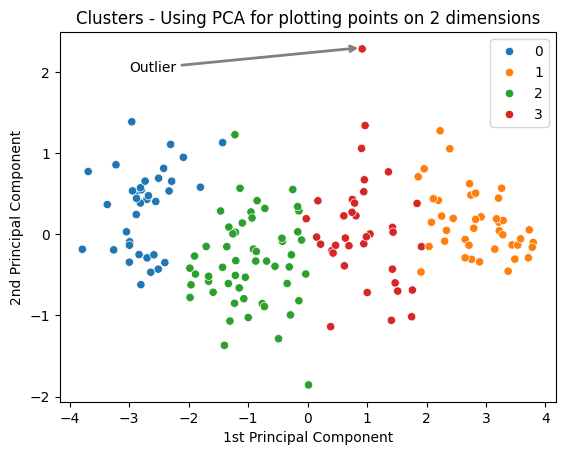

In [301]:
sns.scatterplot(data=pca_data, x='1st Principal Component', y='2nd Principal Component', hue='cluster',
                 palette='tab10')
plt.legend(loc='best')
plt.annotate('Outlier',
              xy=(0.9,2.3),
              xytext=(-3,2),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='gray', lw=2))
plt.title('Clusters - Using PCA for plotting points on 2 dimensions')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

In [302]:
#Let's have a look at the outlier - Cluster 0
pca_data[pca_data['2nd Principal Component'] > 2].index

Index(['Equatorial Guinea'], dtype='object', name='country')

**Cluster Description**

In [303]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import plotly.graph_objects as go

In [304]:
km_cluster.head()

,child_mort,income,life_expec,total_fer,gdpp,cluster
country,,,,,,
Afghanistan,1.282444,-1.369003,-1.525023,1.564927,-1.462212,1
Albania,-0.247198,0.012521,0.621055,-0.995747,-0.121249,2
Algeria,0.210743,0.232299,0.652065,0.295201,-0.063272,2
Angola,1.514755,-0.408359,-1.238339,1.641868,-0.219850,1
Antigua and Barbuda,-0.671243,0.572651,0.699001,-0.396150,0.609478,2


In [305]:
attributes = km_cluster.columns[:5]

fig = go.Figure()

# Loop through each cluster to add traces
for cluster in range(4):  # Assuming you have 4 clusters
    cluster_data = km_cluster.loc[km_cluster.cluster == cluster, attributes]
    if not cluster_data.empty:
        r = np.mean(cluster_data, axis=0).tolist()
        fig.add_trace(go.Scatterpolar(
            r=r,
            theta=attributes,
            fill='toself',
            fillcolor=['blue', 'orange', 'green', 'red'][cluster],
            opacity=0.4,
            name=f'Cluster {cluster}'
        ))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)),
                  showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

In [306]:
# Providing labels to each clusters :
df['cluster'] = km.labels_
df['label'] = None

df.loc[df['cluster'] == 0, 'label'] = 'Highly developed'
df.loc[df['cluster'] == 1, 'label'] = 'Least developed'
df.loc[df['cluster'] == 2, 'label'] = 'Upper-middle developed'
df.loc[df['cluster'] == 3, 'label'] = 'Lower-middle developed'

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,label
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Least developed
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Upper-middle developed
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Upper-middle developed
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Least developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Upper-middle developed


In [307]:
cluster_ds = df.groupby(['cluster','label'], as_index=True).mean()
cluster_ds.T

cluster,0,1,2,3
label,Highly developed,Least developed,Upper-middle developed,Lower-middle developed
child_mort,5.130556,96.114634,14.274074,41.525000
exports,58.444444,26.000244,42.337037,39.138583
health,8.640556,6.456829,6.694630,5.581111
imports,50.475000,43.756098,46.574074,47.349053
income,46230.555556,2077.146341,15650.555556,7460.277778
inflation,3.091111,11.573293,7.197407,9.031139
life_expec,80.144444,59.043902,74.727778,67.819444
total_fer,1.793611,5.180244,1.919444,3.102778
gdpp,42569.444444,994.146341,8663.148148,3442.888889


In [308]:
cluster_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,4.0,39.261066,40.933666,5.130556,11.988194,27.899537,55.172409,96.114634
exports,4.0,41.480077,13.337066,26.000244,35.853998,40.737810,46.363889,58.444444
health,4.0,6.843281,1.290311,5.581111,6.237900,6.575729,7.181111,8.640556
imports,4.0,47.038556,2.762597,43.756098,45.869580,46.961563,48.130540,50.475000
income,4.0,17854.633808,19723.274272,2077.146341,6114.494919,11555.416667,23295.555556,46230.555556
inflation,4.0,7.723238,3.571490,3.091111,6.170833,8.114273,9.666677,11.573293
life_expec,4.0,70.433892,9.115911,59.043902,65.625559,71.273611,76.081944,80.144444
total_fer,4.0,2.999019,1.569182,1.793611,1.887986,2.511111,3.622144,5.180244
gdpp,4.0,13917.406956,19367.263458,994.146341,2830.703252,6053.018519,17139.722222,42569.444444


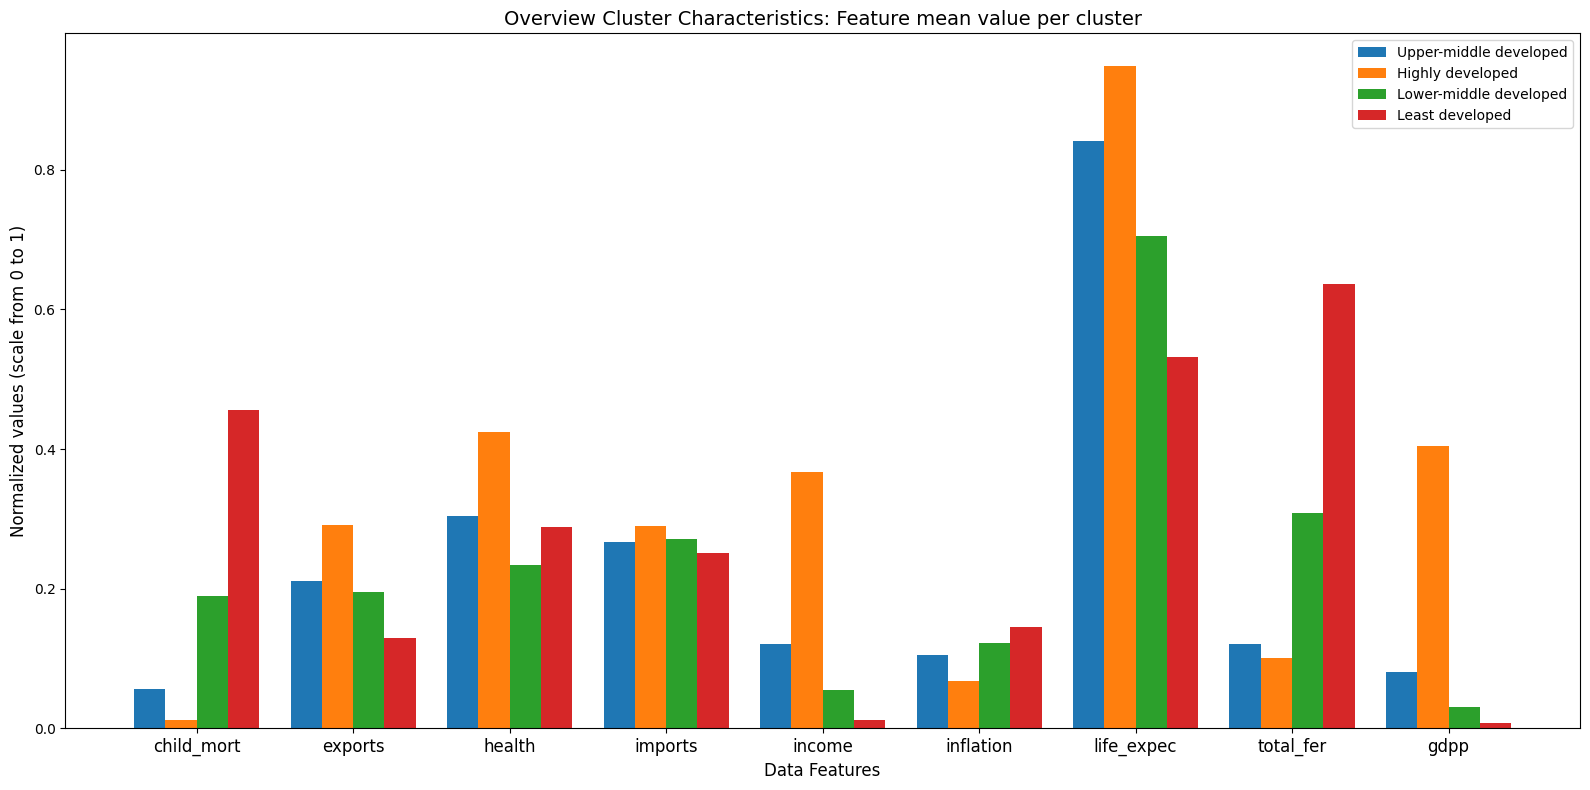

In [309]:
#Normalize the values with MinMax Scaler to plot features by cluster as clustered bar chart.
country_ds_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[df.columns[:-2]]),
                               columns=df.columns[:-2])
country_ds_norm['cluster'] = km.labels_

group_ds = country_ds_norm.groupby(['cluster'], as_index=True).mean()
labels = cluster_ds.columns
cluster_0 = np.ravel(group_ds.loc[0].values)
cluster_1 = np.ravel(group_ds.loc[1].values)
cluster_2 = np.ravel(group_ds.loc[2].values)
cluster_3 = np.ravel(group_ds.loc[3].values)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width*1.5, cluster_2, width, label='Upper-middle developed')
rects2 = ax.bar(x - width/2, cluster_0, width, label='Highly developed' )
rects3 = ax.bar(x + width/2, cluster_3, width, label='Lower-middle developed')
rects4 = ax.bar(x + width*1.5, cluster_1, width, label='Least developed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized values (scale from 0 to 1)', fontsize=12)
ax.set_xlabel('Data Features', fontsize=12)
ax.set_title('Overview Cluster Characteristics: Feature mean value per cluster', fontsize=14)
ax.set_xticks(x, labels, fontsize=12)
ax.legend()

fig.tight_layout()
plt.show()

In [310]:
def cluster_descr(cluster):
    print('List of {} countries:'.format(df[df['cluster'] == cluster]['label'].values[0]))
    print(df[df['cluster'] == cluster].index.tolist())
    print('')
    print('Number of {} countries: '.format(df[df['cluster'] == cluster]['label'].values[0]),
          len(df[df['cluster'] == cluster].index))

In [311]:
# List of Highly developed countries
cluster_descr(0)

List of Highly developed countries:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']

Number of Highly developed countries:  36


In [312]:
# List of Least developed countries
cluster_descr(1)

List of Least developed countries:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia']

Number of Least developed countries:  41


In [313]:
# List of Upper-middle developed countries
cluster_descr(2)

List of Upper-middle developed countries:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Ecuador', 'El Salvador', 'Estonia', 'Georgia', 'Grenada', 'Hungary', 'Iran', 'Jamaica', 'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Panama', 'Peru', 'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Venezuela']

Number of Upper-middle developed countries:  54


In [314]:
# List of Lower-middle developed countries
cluster_descr(3)

List of Lower-middle developed countries:
['Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Cambodia', 'Cape Verde', 'Dominican Republic', 'Egypt', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Guatemala', 'Guyana', 'India', 'Indonesia', 'Iraq', 'Jordan', 'Kyrgyz Republic', 'Lao', 'Micronesia, Fed. Sts.', 'Mongolia', 'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Paraguay', 'Philippines', 'Samoa', 'South Africa', 'Tonga', 'Turkmenistan', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen']

Number of Lower-middle developed countries:  36


In [318]:
import pickle
import pandas as pd

# Save DataFrame as Pickle file
with open("cluster_countries.pkl", "wb") as file:
    pickle.dump(df, file)

print("Pickle file created successfully!")

Pickle file created successfully!


# **Outcome of the analysis**
K-Means clustered the 167 countries included in the dataset into the following categories:

**Cluster 0** - Highly developed: Countries with the highest values in Income, Life Expectancy, GDP per capita, and lowest values in Child Mortality and Total Fertility.

**Cluster 1** - Least developed: Countries with, by far, the highest values in Child Mortality and Total Fertility as well as the smallest values in Income, Life Expectancy, and GDP per capita.

**Cluster 2** - Upper-middle developed: Income, Life Expectancy, GDP per capita mean values are smaller than the Highly developed countrie's average, but above the population average. Child Mortality and Total Fertility means values are greater then cluster 0 mean values, however still below the dataset average.

**Cluster 3** - Lower-middle developed: Countries with Income, Life Expectancy, GDP per capita mean values below the average, and Child Mortality and Total Fertility mean values above the average..

# ***Insights and Recommendations :***

**Cluster 0 : Highly Developed Countries**

```
Insight: These countries show strong economic and social indicators, such as high GDP, life expectancy, and education levels. They generally have robust healthcare systems and infrastructures.
Recommendation: Prioritize strategic partnerships and collaborative projects in these nations, focusing on knowledge exchange, technology transfer, and joint research initiatives to further global development goals.
```


**Cluster 1: Least developed Countries**
```
Insight: This cluster represents countries with the most critical needs, showing the lowest economic and social indicators. These nations are often affected by conflicts, natural disasters, and political instability.
Recommendation: Focus immediate humanitarian aid on these countries, with programs aimed at crisis relief, emergency healthcare, and basic survival needs. Additionally, consider long-term interventions aimed at stabilizing governance, rebuilding infrastructure, and fostering sustainable development.
```


Cluster 2: Upper-middle developed **bold text**

```
Insight: Countries in this cluster are on the path of rapid economic growth and improved social indicators but still face significant challenges, particularly in healthcare and education.
Recommendation: Allocate resources to support ongoing development, with a focus on infrastructure projects, healthcare systems strengthening, and educational programs. Aid should be designed to sustain their upward trajectory while addressing critical gaps.
```



**Cluster 3: Lower-middle developed**

```
Insight: These countries have lower GDP and life expectancy, with significant challenges in health, education, and economic stability. They often rely on international aid to meet basic needs.
Recommendation: Direct substantial aid to these nations, prioritizing basic healthcare, education, clean water, and food security initiatives. Long-term development plans should include capacity building and resilience strategies to reduce dependency on external aid.
```


